In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## for outliers:
from scipy import stats
from scipy.stats import mstats
from scipy.stats.mstats import winsorize

## for models:
from sklearn.model_selection import train_test_split

## for dim reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## for algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#for performance
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix

C:\Users\Salma\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Cancer.csv")

## To know more about data:

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
df.shape

(569, 32)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Check for duplicates:

In [8]:
df.duplicated().sum()

0

## Check for missing values & nulls:

In [9]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df.isin({"?", "NA", "unknown", "0.00", "NaN"}).sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Check for outliers:

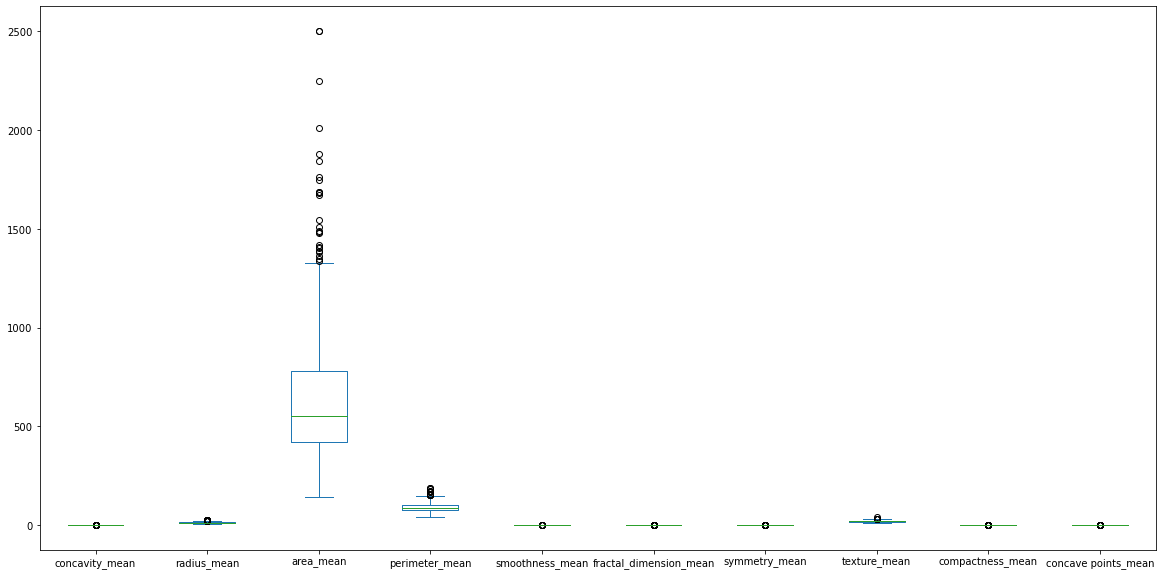

In [11]:
df[{"texture_mean", "radius_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean",
  "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean" }].plot(kind = "box", figsize=(20,10))
plt.show()

### All columns here have outliers.

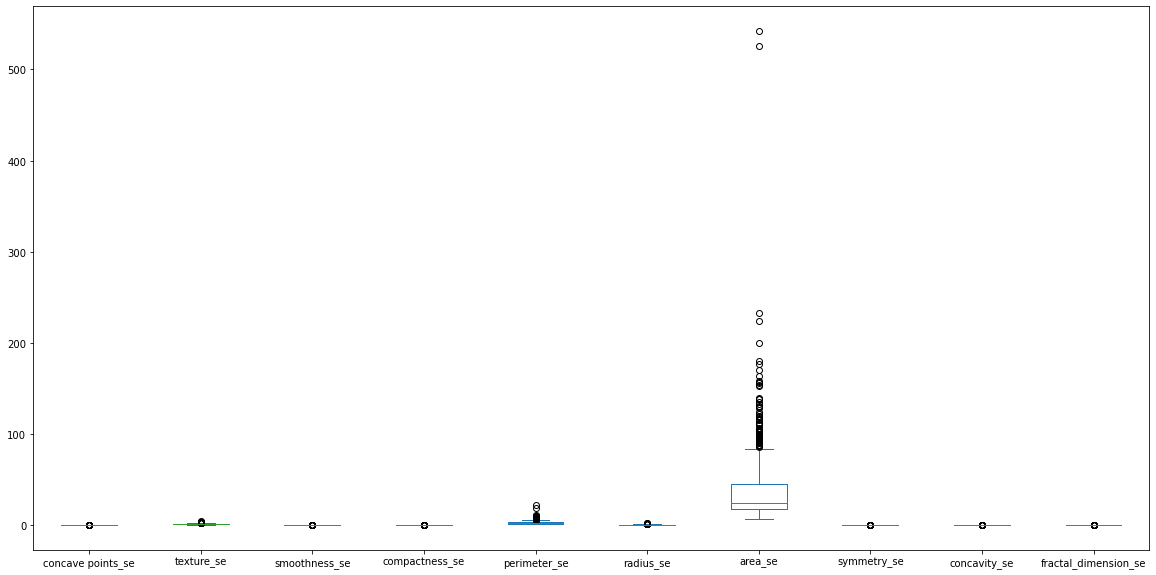

In [12]:
df[{"texture_se", "radius_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se",
  "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se" }].plot(kind = "box", figsize=(20,10))
plt.show()

### All columns here have outliers.

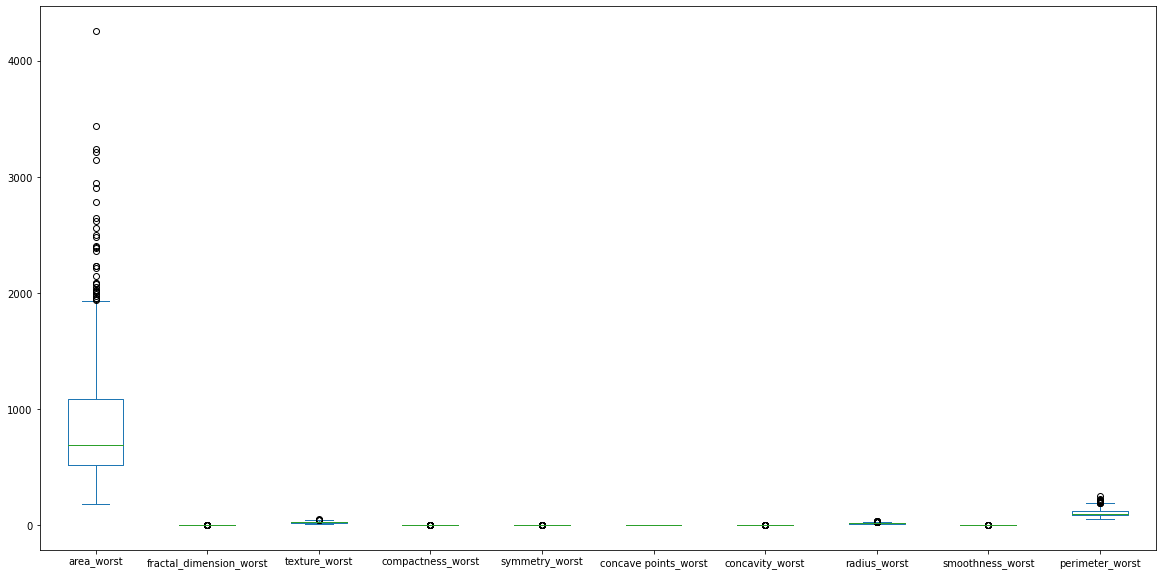

In [13]:
df[{"texture_worst", "radius_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst",
  "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst" }].plot(kind = "box", figsize=(20,10))
plt.show()

### All columns here have outliers except "concave_worst".

## Detect outliers:

In [14]:
def detect_outliers (df, col):
    zscore = stats.zscore(df[col])
    outliers = df[(zscore > 3) | (zscore < -3)]
    
    return outliers

## Handling outliers:

In [15]:
def handle_outliers (df, col):
    
    fig, axes = plt.subplots(1,2, figsize = (15,5))
    sns.boxplot(df[col], ax = axes[0]) ## befor treating
    
    df[col] = mstats.winsorize(df[col], limits = [0.1, 0.2])
    
    sns.boxplot(df[col], ax = axes[1]) ## after treating
    
    axes[0].set_title("Before handling the outliers: ")
    axes[1].set_title("After handling the outliers: ")
    return plt.show()
    

In [16]:
## To handle all dataframe outliers at the same time:
def handle_outlier (df):
    
    for i in df:
        
        df[i] = mstats.winsorize(df[i], limits = [0.1, 0.2])
## but i prefer column by column to see the boxplot before and after.

## Working on columns:

### mean columns

In [17]:
detect_outliers(df, "perimeter_mean")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,M,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
122,865423,M,24.25,20.20,166.2,1761.0,0.1447,0.2867,0.4268,0.2012,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
180,873592,M,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,8810703,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
352,899987,M,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,911296202,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
521,91762702,M,24.63,21.60,165.5,1841.0,0.1030,0.2106,0.2310,0.1471,...,29.92,26.93,205.7,2642.0,0.1342,0.4188,0.4658,0.2475,0.3157,0.09671


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


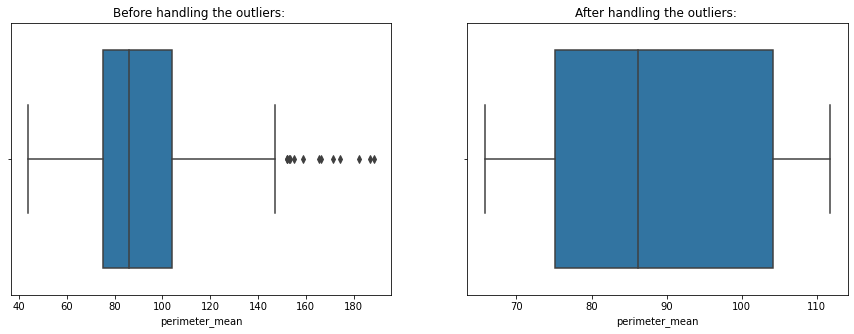

In [18]:
handle_outliers(df, "perimeter_mean")

In [19]:
detect_outliers(df, "texture_mean")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
219,88119002,M,19.53,32.47,111.80,1223.0,0.08420,0.11300,0.114500,0.066370,...,27.90,45.41,180.20,2477.0,0.14080,0.40970,0.39950,0.16250,0.2713,0.07568
232,88203002,B,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,...,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
239,88330202,M,17.46,39.28,111.80,920.6,0.09812,0.12980,0.141700,0.088110,...,22.51,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496
259,88725602,M,15.53,33.56,103.70,744.9,0.10630,0.16390,0.175100,0.083990,...,18.49,49.54,126.30,1035.0,0.18830,0.55640,0.57030,0.20140,0.3512,0.12040


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


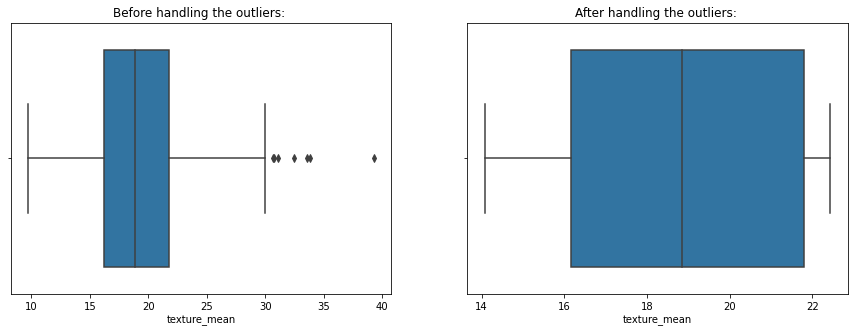

In [20]:
handle_outliers(df, "texture_mean")

In [21]:
detect_outliers(df, "radius_mean")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,M,25.22,22.44,111.8,1878.0,0.1063,0.2665,0.3339,0.1845,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
180,873592,M,27.22,21.87,111.8,2250.0,0.1094,0.1914,0.2871,0.1878,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,8810703,M,28.11,18.47,111.8,2499.0,0.1142,0.1516,0.3201,0.1595,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
352,899987,M,25.73,17.46,111.8,2010.0,0.1149,0.2363,0.3368,0.1913,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,911296202,M,27.42,22.44,111.8,2501.0,0.1084,0.1988,0.3635,0.1689,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


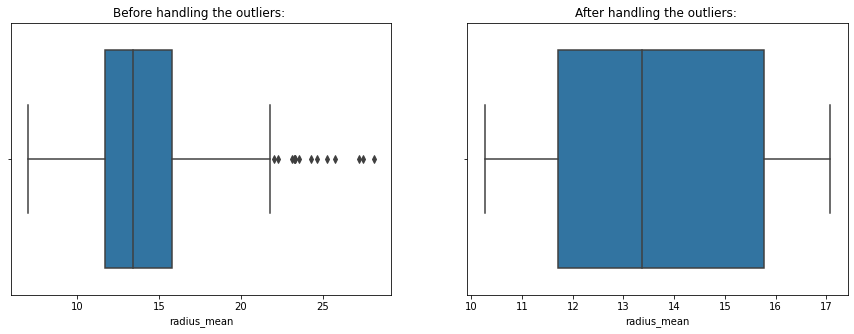

In [22]:
handle_outliers(df, "radius_mean")

In [23]:
detect_outliers(df, "area_mean")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,M,17.08,22.44,111.8,1878.0,0.1063,0.2665,0.3339,0.1845,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
122,865423,M,17.08,20.20,111.8,1761.0,0.1447,0.2867,0.4268,0.2012,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
180,873592,M,17.08,21.87,111.8,2250.0,0.1094,0.1914,0.2871,0.1878,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,8810703,M,17.08,18.47,111.8,2499.0,0.1142,0.1516,0.3201,0.1595,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
339,89812,M,17.08,22.44,111.8,1747.0,0.1069,0.1283,0.2308,0.1410,...,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
352,899987,M,17.08,17.46,111.8,2010.0,0.1149,0.2363,0.3368,0.1913,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,911296202,M,17.08,22.44,111.8,2501.0,0.1084,0.1988,0.3635,0.1689,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
521,91762702,M,17.08,21.60,111.8,1841.0,0.1030,0.2106,0.2310,0.1471,...,29.92,26.93,205.7,2642.0,0.1342,0.4188,0.4658,0.2475,0.3157,0.09671


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


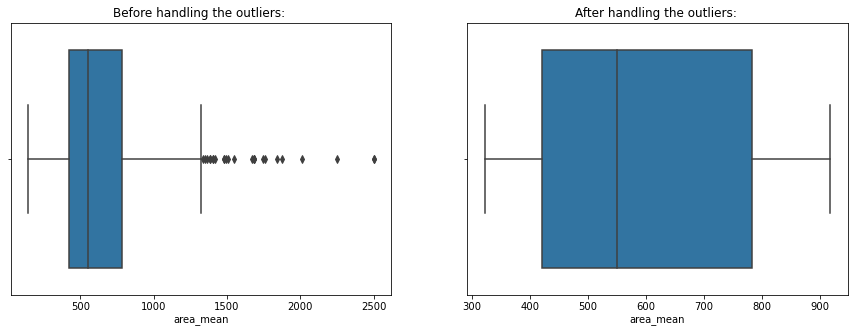

In [24]:
handle_outliers(df, "area_mean")

In [25]:
detect_outliers(df, "smoothness_mean")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
105,863030,M,13.11,15.56,87.21,530.2,0.13980,0.17650,0.2071,0.09601,...,16.310,22.40,106.40,827.2,0.18620,0.40990,0.6376,0.1986,0.3147,0.14050
122,865423,M,17.08,20.20,111.80,918.6,0.14470,0.28670,0.4268,0.20120,...,26.020,23.99,180.90,2073.0,0.16960,0.42440,0.5803,0.2248,0.3222,0.08009
504,915186,B,10.26,14.07,65.75,321.6,0.16340,0.22390,0.0973,0.05252,...,10.280,16.38,69.05,300.2,0.19020,0.34410,0.2099,0.1025,0.3038,0.12520
568,92751,B,10.26,22.44,65.75,321.6,0.05263,0.04362,0.0000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


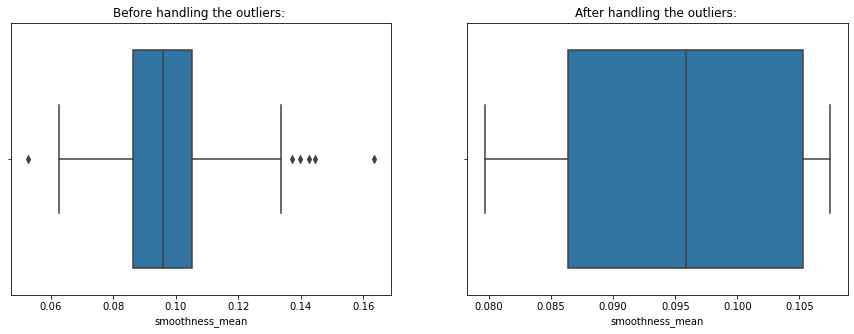

In [26]:
handle_outliers(df, "smoothness_mean")

In [27]:
detect_outliers(df, "compactness_mean")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.08,14.07,111.80,918.6,0.1075,0.2776,0.3001,0.1471,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
3,84348301,M,11.42,20.38,77.58,386.1,0.1075,0.2839,0.2414,0.1052,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
78,8610862,M,17.08,22.44,111.80,918.6,0.1075,0.3454,0.3754,0.1604,...,23.37,31.72,170.30,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
82,8611555,M,17.08,22.44,111.80,918.6,0.1063,0.2665,0.3339,0.1845,...,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,M,17.08,19.67,111.80,918.6,0.1075,0.2768,0.4264,0.1823,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,M,17.08,20.20,111.80,918.6,0.1075,0.2867,0.4268,0.2012,...,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
181,873593,M,17.08,22.44,111.80,918.6,0.1075,0.2832,0.2487,0.1496,...,26.68,33.48,176.50,2089.0,0.1491,0.7584,0.6780,0.2903,0.4098,0.12840
258,887181,M,15.66,22.44,110.20,773.5,0.1075,0.3114,0.3176,0.1377,...,19.85,31.64,143.70,1226.0,0.1504,0.5172,0.6181,0.2462,0.3277,0.10190
567,927241,M,17.08,22.44,111.80,918.6,0.1075,0.2770,0.3514,0.1520,...,25.74,39.42,184.60,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


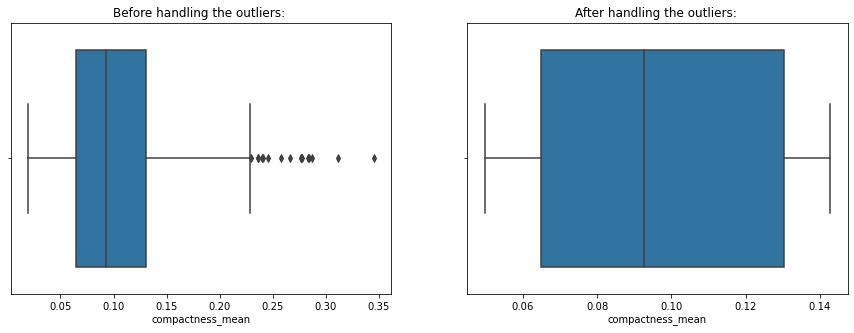

In [28]:
handle_outliers(df, "compactness_mean")

In [29]:
detect_outliers(df, "concavity_mean")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
78,8610862,M,17.08,22.44,111.80,918.6,0.1075,0.1428,0.3754,0.16040,...,23.37,31.72,170.30,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
82,8611555,M,17.08,22.44,111.80,918.6,0.1063,0.1428,0.3339,0.18450,...,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,M,17.08,19.67,111.80,918.6,0.1075,0.1428,0.4264,0.18230,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,M,17.08,20.20,111.80,918.6,0.1075,0.1428,0.4268,0.20120,...,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
152,8710441,B,10.26,15.34,65.75,321.6,0.1072,0.1428,0.4108,0.07857,...,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.12590
202,878796,M,17.08,22.44,111.80,918.6,0.1075,0.1428,0.3523,0.16200,...,25.12,32.68,177.00,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
352,899987,M,17.08,17.46,111.80,918.6,0.1075,0.1428,0.3368,0.19130,...,33.13,23.58,229.30,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,911296202,M,17.08,22.44,111.80,918.6,0.1075,0.1428,0.3635,0.16890,...,36.04,31.37,251.20,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
567,927241,M,17.08,22.44,111.80,918.6,0.1075,0.1428,0.3514,0.15200,...,25.74,39.42,184.60,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


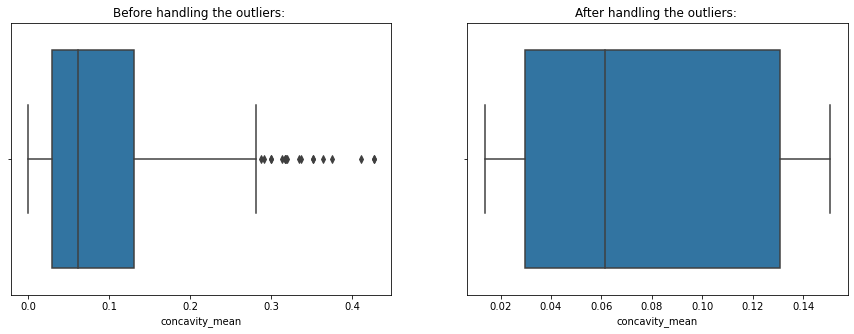

In [30]:
handle_outliers(df, "concavity_mean")

In [31]:
detect_outliers(df, "concave points_mean")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,M,17.08,22.44,111.8,918.6,0.1063,0.1428,0.1508,0.1845,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,M,17.08,19.67,111.8,918.6,0.1075,0.1428,0.1508,0.1823,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,M,17.08,20.20,111.8,918.6,0.1075,0.1428,0.1508,0.2012,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
180,873592,M,17.08,21.87,111.8,918.6,0.1075,0.1428,0.1508,0.1878,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
352,899987,M,17.08,17.46,111.8,918.6,0.1075,0.1428,0.1508,0.1913,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,911296202,M,17.08,22.44,111.8,918.6,0.1075,0.1428,0.1508,0.1689,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


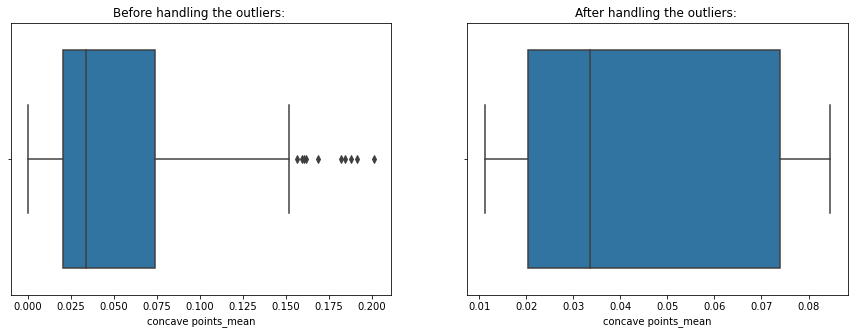

In [32]:
handle_outliers(df, "concave points_mean")

In [33]:
detect_outliers(df, "symmetry_mean")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
25,852631,M,17.08,16.40,111.80,912.7,0.1075,0.14280,0.15080,0.08465,...,22.25,21.40,152.40,1461.0,0.1545,0.39490,0.38530,0.25500,0.4066,0.10590
60,858970,B,10.26,14.88,65.75,321.6,0.1075,0.08061,0.01367,0.01290,...,11.02,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
78,8610862,M,17.08,22.44,111.80,918.6,0.1075,0.14280,0.15080,0.08465,...,23.37,31.72,170.30,1623.0,0.1639,0.61640,0.76810,0.25080,0.5440,0.09964
122,865423,M,17.08,20.20,111.80,918.6,0.1075,0.14280,0.15080,0.08465,...,26.02,23.99,180.90,2073.0,0.1696,0.42440,0.58030,0.22480,0.3222,0.08009
146,869691,M,11.80,16.58,78.99,432.0,0.1075,0.14280,0.15080,0.07415,...,13.74,26.38,91.93,591.7,0.1385,0.40920,0.45040,0.18650,0.5774,0.10300


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


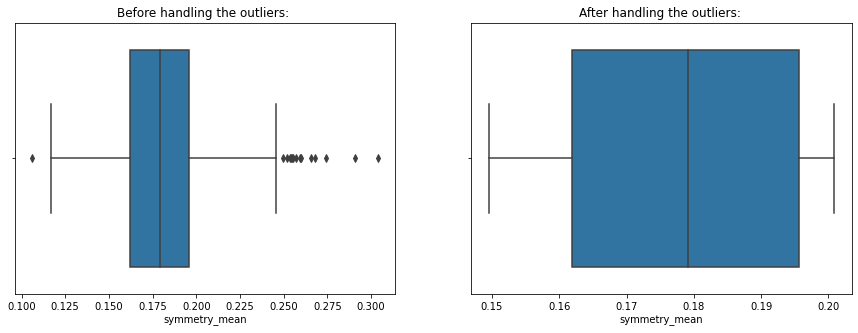

In [34]:
handle_outliers(df, "symmetry_mean")

In [35]:
detect_outliers(df, "fractal_dimension_mean")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.42,20.38,77.58,386.1,0.10750,0.1428,0.15080,0.08465,...,14.910,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.1730
71,859711,B,10.26,14.64,65.75,321.6,0.09783,0.1428,0.08606,0.02872,...,9.733,15.67,62.56,284.4,0.1207,0.2436,0.1434,0.04786,0.2254,0.1084
152,8710441,B,10.26,15.34,65.75,321.6,0.10720,0.1428,0.15080,0.07857,...,11.020,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.15710,0.3108,0.1259
318,894329,B,10.26,18.90,65.75,321.6,0.09968,0.1428,0.15080,0.04908,...,10.060,23.40,68.62,297.1,0.1221,0.3748,0.4609,0.11450,0.3135,0.1055
376,901315,B,10.57,20.22,70.15,338.3,0.09073,0.1428,0.15080,0.05941,...,10.850,22.82,76.51,351.9,0.1143,0.3619,0.6030,0.14650,0.2597,0.1200
504,915186,B,10.26,14.07,65.75,321.6,0.10750,0.1428,0.09730,0.05252,...,10.280,16.38,69.05,300.2,0.1902,0.3441,0.2099,0.10250,0.3038,0.1252
505,915276,B,10.26,14.07,65.75,321.6,0.10750,0.1428,0.11880,0.07038,...,10.600,18.04,69.47,328.1,0.2006,0.3663,0.2913,0.10750,0.2848,0.1364


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


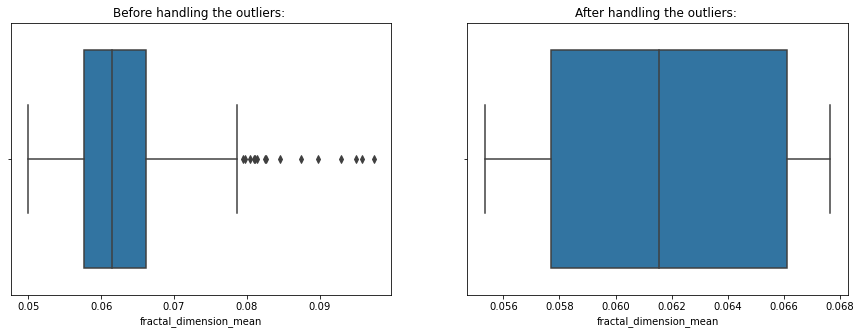

In [36]:
handle_outliers(df, "fractal_dimension_mean")

### se columns:

In [37]:
detect_outliers(df, "perimeter_se")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,846226,M,17.08,22.44,111.8,918.6,0.09740,0.1428,0.1508,0.08465,...,20.96,29.94,151.7,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230
108,86355,M,17.08,19.67,111.8,918.6,0.10750,0.1428,0.1508,0.08465,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,M,17.08,20.20,111.8,918.6,0.10750,0.1428,0.1508,0.08465,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
212,8810703,M,17.08,18.47,111.8,918.6,0.10750,0.1428,0.1508,0.08465,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
258,887181,M,15.66,22.44,110.2,773.5,0.10750,0.1428,0.1508,0.08465,...,19.85,31.64,143.7,1226.0,0.1504,0.5172,0.6181,0.2462,0.3277,0.10190
417,90602302,M,15.50,21.08,102.9,803.1,0.10750,0.1428,0.1508,0.08465,...,23.17,27.65,157.1,1748.0,0.1517,0.4002,0.4211,0.2134,0.3003,0.10480
461,911296202,M,17.08,22.44,111.8,918.6,0.10750,0.1428,0.1508,0.08465,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
503,915143,M,17.08,19.83,111.8,918.6,0.09342,0.1275,0.1508,0.08465,...,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


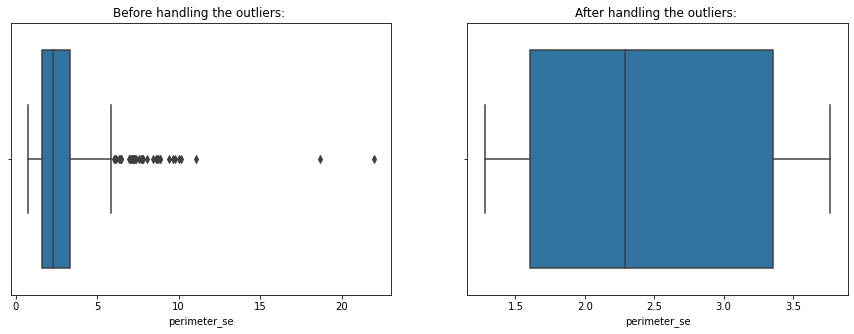

In [38]:
handle_outliers(df, "perimeter_se")

In [39]:
detect_outliers(df, "texture_se")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,846226,M,17.08,22.44,111.80,918.6,0.09740,0.14280,0.15080,0.08465,...,20.960,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230
83,8611792,M,17.08,22.44,111.80,918.6,0.10750,0.14280,0.15080,0.08465,...,20.330,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
122,865423,M,17.08,20.20,111.80,918.6,0.10750,0.14280,0.15080,0.08465,...,26.020,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
192,875099,B,10.26,18.22,65.75,321.6,0.07963,0.04966,0.01367,0.01115,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559
416,905978,B,10.26,21.70,65.75,321.6,0.10440,0.06159,0.02047,0.01257,...,10.850,31.24,68.73,359.4,0.15260,0.11930,0.06141,0.03770,0.2872,0.08304
473,9113846,B,12.27,22.44,77.42,465.4,0.07963,0.04966,0.01367,0.01115,...,13.450,38.05,85.08,558.9,0.09422,0.05213,0.00000,0.00000,0.2409,0.06743
557,925236,B,10.26,22.44,65.75,321.6,0.08123,0.04971,0.01367,0.01115,...,10.490,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
559,925291,B,11.51,22.44,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
561,925311,B,11.20,22.44,70.67,386.0,0.07963,0.04966,0.01367,0.01115,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


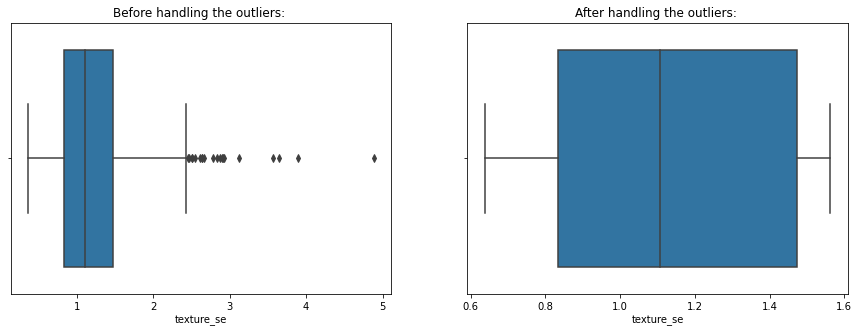

In [40]:
handle_outliers(df, "texture_se")

In [41]:
detect_outliers(df, "radius_se")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
122,865423,M,17.08,20.20,111.80,918.6,0.10750,0.1428,0.1508,0.08465,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
138,868826,M,14.95,17.57,96.85,678.1,0.10750,0.1305,0.1508,0.08465,...,18.55,21.43,121.4,971.4,0.1411,0.2164,0.3355,0.1667,0.3414,0.07147
212,8810703,M,17.08,18.47,111.80,918.6,0.10750,0.1428,0.1508,0.08465,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
258,887181,M,15.66,22.44,110.20,773.5,0.10750,0.1428,0.1508,0.08465,...,19.85,31.64,143.7,1226.0,0.1504,0.5172,0.6181,0.2462,0.3277,0.10190
417,90602302,M,15.50,21.08,102.90,803.1,0.10750,0.1428,0.1508,0.08465,...,23.17,27.65,157.1,1748.0,0.1517,0.4002,0.4211,0.2134,0.3003,0.10480
461,911296202,M,17.08,22.44,111.80,918.6,0.10750,0.1428,0.1508,0.08465,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
503,915143,M,17.08,19.83,111.80,918.6,0.09342,0.1275,0.1508,0.08465,...,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


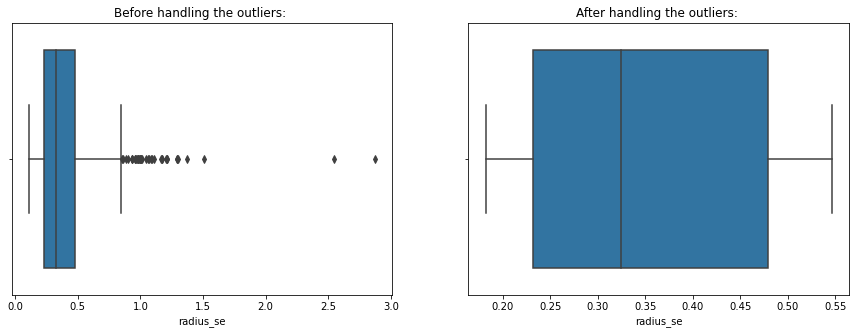

In [42]:
handle_outliers(df, "radius_se")

In [43]:
detect_outliers(df, "area_se")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
122,865423,M,17.08,20.20,111.8,918.6,0.10750,0.14280,0.1508,0.08465,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
212,8810703,M,17.08,18.47,111.8,918.6,0.10750,0.14280,0.1508,0.08465,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
265,88995002,M,17.08,22.44,111.8,918.6,0.09469,0.11430,0.1367,0.08465,...,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
368,9011971,M,17.08,17.25,111.8,918.6,0.09384,0.08562,0.1168,0.08465,...,30.75,26.44,199.5,3143.0,0.1363,0.1628,0.2861,0.1820,0.2510,0.06494
461,911296202,M,17.08,22.44,111.8,918.6,0.10750,0.14280,0.1508,0.08465,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
503,915143,M,17.08,19.83,111.8,918.6,0.09342,0.12750,0.1508,0.08465,...,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


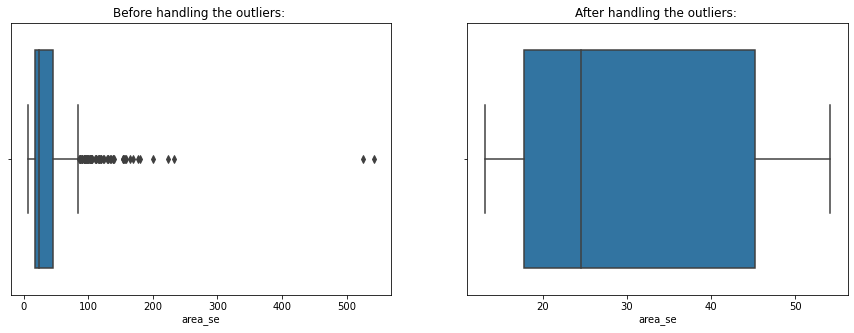

In [44]:
handle_outliers(df, "area_se")

In [45]:
detect_outliers(df, "smoothness_se")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
71,859711,B,10.26,14.64,65.75,321.6,0.09783,0.14280,0.08606,0.02872,...,9.733,15.67,62.56,284.4,0.1207,0.24360,0.14340,0.04786,0.2254,0.10840
116,864726,B,10.26,15.76,65.75,321.6,0.09462,0.12430,0.09263,0.02308,...,9.414,17.07,63.34,270.0,0.1179,0.18790,0.15440,0.03846,0.1652,0.07722
122,865423,M,17.08,20.20,111.80,918.6,0.10750,0.14280,0.15080,0.08465,...,26.020,23.99,180.90,2073.0,0.1696,0.42440,0.58030,0.22480,0.3222,0.08009
213,881094802,M,17.08,22.44,111.80,918.6,0.10060,0.11460,0.15080,0.06597,...,18.070,28.07,120.40,1021.0,0.1243,0.17930,0.28030,0.10990,0.1603,0.06818
314,894047,B,10.26,18.60,65.75,321.6,0.10740,0.05847,0.01367,0.01115,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116
345,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.880,19.48,70.89,357.1,0.1360,0.16360,0.07162,0.04074,0.2434,0.08488
505,915276,B,10.26,14.07,65.75,321.6,0.10750,0.14280,0.11880,0.07038,...,10.600,18.04,69.47,328.1,0.2006,0.36630,0.29130,0.10750,0.2848,0.13640


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


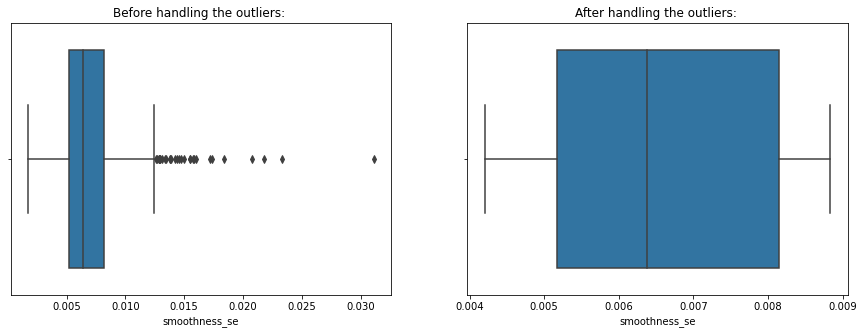

In [46]:
handle_outliers(df, "smoothness_se")

In [47]:
detect_outliers(df, "compactness_se")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,846226,M,17.08,22.44,111.80,918.6,0.09740,0.1428,0.15080,0.08465,...,20.960,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230
42,855625,M,17.08,22.44,111.80,918.6,0.09081,0.1428,0.15080,0.08465,...,24.090,33.17,177.40,1651.0,0.12470,0.7444,0.7242,0.24930,0.4670,0.10380
68,859471,B,10.26,17.33,65.75,321.6,0.10660,0.1413,0.15080,0.04375,...,10.310,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.17500,0.4228,0.11750
71,859711,B,10.26,14.64,65.75,321.6,0.09783,0.1428,0.08606,0.02872,...,9.733,15.67,62.56,284.4,0.12070,0.2436,0.1434,0.04786,0.2254,0.10840
108,86355,M,17.08,19.67,111.80,918.6,0.10750,0.1428,0.15080,0.08465,...,28.400,28.01,206.80,2360.0,0.17010,0.6997,0.9608,0.29100,0.4055,0.09789
122,865423,M,17.08,20.20,111.80,918.6,0.10750,0.1428,0.15080,0.08465,...,26.020,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.22480,0.3222,0.08009
152,8710441,B,10.26,15.34,65.75,321.6,0.10720,0.1428,0.15080,0.07857,...,11.020,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.15710,0.3108,0.12590
176,872608,B,10.26,18.06,65.75,321.6,0.09699,0.1294,0.13070,0.03716,...,11.260,24.39,73.07,390.2,0.13010,0.2950,0.3486,0.09910,0.2614,0.11620
190,874858,M,14.22,22.44,94.37,609.9,0.10750,0.1428,0.15080,0.06618,...,15.740,37.18,106.40,762.4,0.15330,0.9327,0.8488,0.17720,0.5166,0.14460
213,881094802,M,17.08,22.44,111.80,918.6,0.10060,0.1146,0.15080,0.06597,...,18.070,28.07,120.40,1021.0,0.12430,0.1793,0.2803,0.10990,0.1603,0.06818


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


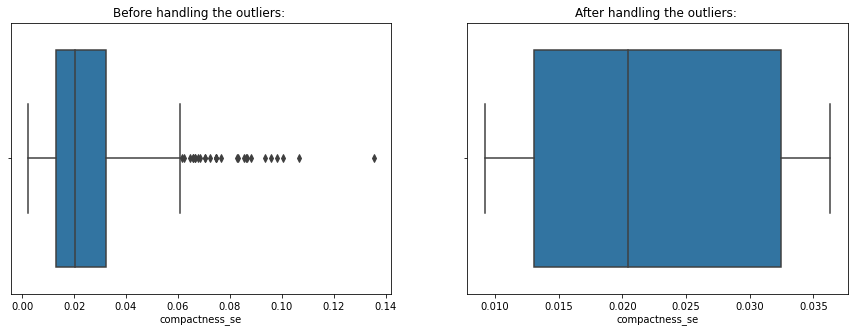

In [48]:
handle_outliers(df, "compactness_se")

In [49]:
detect_outliers(df, "concavity_se")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,859471,B,10.26,17.33,65.75,321.6,0.10660,0.1413,0.1508,0.04375,...,10.31,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.1750,0.4228,0.11750
112,86409,B,14.26,19.65,97.83,629.9,0.07963,0.1428,0.1508,0.07798,...,15.30,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.10820
122,865423,M,17.08,20.20,111.80,918.6,0.10750,0.1428,0.1508,0.08465,...,26.02,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.2248,0.3222,0.08009
152,8710441,B,10.26,15.34,65.75,321.6,0.10720,0.1428,0.1508,0.07857,...,11.02,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.1571,0.3108,0.12590
213,881094802,M,17.08,22.44,111.80,918.6,0.10060,0.1146,0.1508,0.06597,...,18.07,28.07,120.40,1021.0,0.12430,0.1793,0.2803,0.1099,0.1603,0.06818
376,901315,B,10.57,20.22,70.15,338.3,0.09073,0.1428,0.1508,0.05941,...,10.85,22.82,76.51,351.9,0.11430,0.3619,0.6030,0.1465,0.2597,0.12000


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


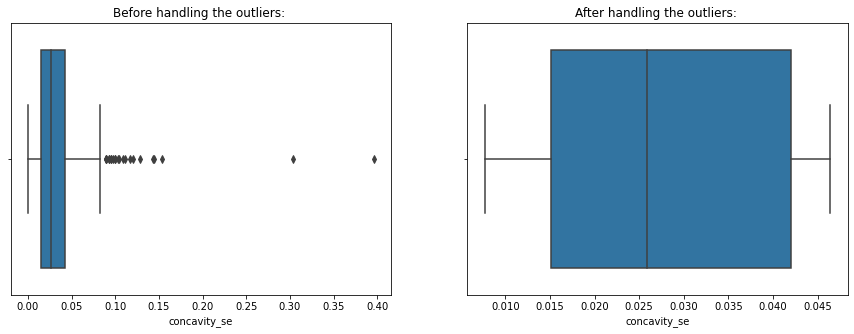

In [50]:
handle_outliers(df, "concavity_se")

In [51]:
detect_outliers(df, "concave points_se")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,846226,M,17.08,22.44,111.80,918.6,0.0974,0.1428,0.15080,0.08465,...,20.96,29.94,151.70,1332.0,0.1037,0.3903,0.3639,0.17670,0.3176,0.10230
68,859471,B,10.26,17.33,65.75,321.6,0.1066,0.1413,0.15080,0.04375,...,10.31,22.65,65.50,324.7,0.1482,0.4365,1.2520,0.17500,0.4228,0.11750
152,8710441,B,10.26,15.34,65.75,321.6,0.1072,0.1428,0.15080,0.07857,...,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.15710,0.3108,0.12590
213,881094802,M,17.08,22.44,111.80,918.6,0.1006,0.1146,0.15080,0.06597,...,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.2803,0.10990,0.1603,0.06818
288,8913049,B,11.26,19.96,73.72,394.1,0.0802,0.1181,0.09274,0.05588,...,11.86,22.33,78.27,437.6,0.1028,0.1843,0.1546,0.09314,0.2955,0.07009
389,90312,M,17.08,22.44,111.80,918.6,0.1010,0.1318,0.15080,0.08465,...,20.82,30.44,142.00,1313.0,0.1251,0.2414,0.3829,0.18250,0.2576,0.07602


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


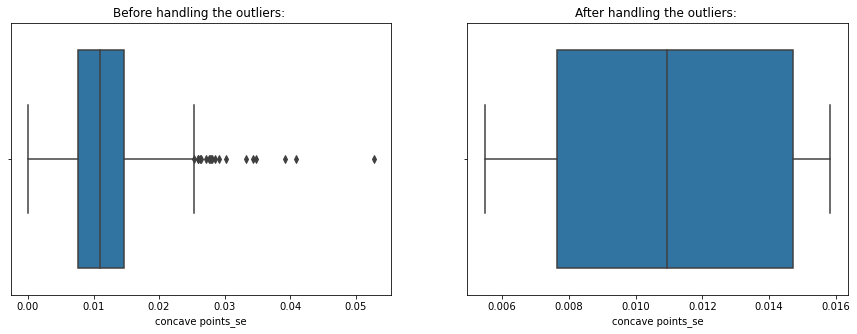

In [52]:
handle_outliers(df, "concave points_se")

In [53]:
detect_outliers(df, "symmetry_se")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.42,20.38,77.58,386.1,0.10750,0.14280,0.15080,0.08465,...,14.910,26.50,98.87,567.7,0.2098,0.86630,0.6869,0.2575,0.6638,0.17300
42,855625,M,17.08,22.44,111.80,918.6,0.09081,0.14280,0.15080,0.08465,...,24.090,33.17,177.40,1651.0,0.1247,0.74440,0.7242,0.2493,0.4670,0.10380
78,8610862,M,17.08,22.44,111.80,918.6,0.10750,0.14280,0.15080,0.08465,...,23.370,31.72,170.30,1623.0,0.1639,0.61640,0.7681,0.2508,0.5440,0.09964
119,865128,M,17.08,20.01,111.80,918.6,0.08402,0.06722,0.07293,0.05596,...,20.580,27.83,129.20,1261.0,0.1072,0.12020,0.2249,0.1185,0.4882,0.06111
122,865423,M,17.08,20.20,111.80,918.6,0.10750,0.14280,0.15080,0.08465,...,26.020,23.99,180.90,2073.0,0.1696,0.42440,0.5803,0.2248,0.3222,0.08009
138,868826,M,14.95,17.57,96.85,678.1,0.10750,0.13050,0.15080,0.08465,...,18.550,21.43,121.40,971.4,0.1411,0.21640,0.3355,0.1667,0.3414,0.07147
146,869691,M,11.80,16.58,78.99,432.0,0.10750,0.14280,0.15080,0.07415,...,13.740,26.38,91.93,591.7,0.1385,0.40920,0.4504,0.1865,0.5774,0.10300
190,874858,M,14.22,22.44,94.37,609.9,0.10750,0.14280,0.15080,0.06618,...,15.740,37.18,106.40,762.4,0.1533,0.93270,0.8488,0.1772,0.5166,0.14460
212,8810703,M,17.08,18.47,111.80,918.6,0.10750,0.14280,0.15080,0.08465,...,28.110,18.47,188.50,2499.0,0.1142,0.15160,0.3201,0.1595,0.1648,0.05525
314,894047,B,10.26,18.60,65.75,321.6,0.10740,0.05847,0.01367,0.01115,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.0000,0.0000,0.3142,0.08116


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


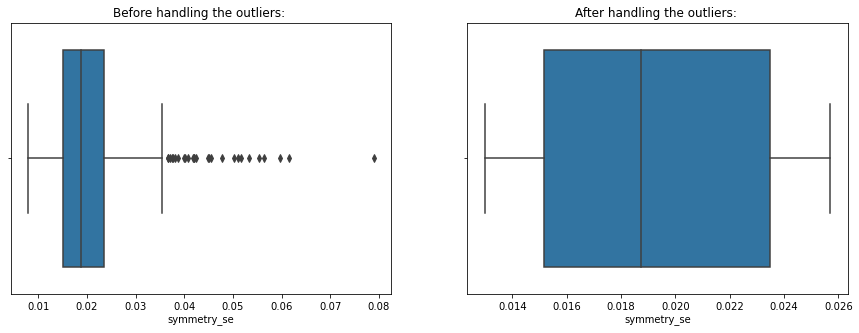

In [54]:
handle_outliers(df, "symmetry_se")

In [55]:
detect_outliers(df, "fractal_dimension_se")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,846226,M,17.08,22.44,111.80,918.6,0.09740,0.1428,0.15080,0.08465,...,20.960,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230
71,859711,B,10.26,14.64,65.75,321.6,0.09783,0.1428,0.08606,0.02872,...,9.733,15.67,62.56,284.4,0.12070,0.2436,0.1434,0.04786,0.2254,0.10840
112,86409,B,14.26,19.65,97.83,629.9,0.07963,0.1428,0.15080,0.07798,...,15.300,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.15050,0.2398,0.10820
151,871001502,B,10.26,20.70,65.75,321.6,0.09405,0.1305,0.13210,0.02168,...,9.092,29.72,58.08,249.8,0.16300,0.4310,0.5381,0.07879,0.3322,0.14860
152,8710441,B,10.26,15.34,65.75,321.6,0.10720,0.1428,0.15080,0.07857,...,11.020,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.15710,0.3108,0.12590
176,872608,B,10.26,18.06,65.75,321.6,0.09699,0.1294,0.13070,0.03716,...,11.260,24.39,73.07,390.2,0.13010,0.2950,0.3486,0.09910,0.2614,0.11620
213,881094802,M,17.08,22.44,111.80,918.6,0.10060,0.1146,0.15080,0.06597,...,18.070,28.07,120.40,1021.0,0.12430,0.1793,0.2803,0.10990,0.1603,0.06818
290,89143602,B,14.41,19.73,96.03,651.0,0.08757,0.1428,0.13620,0.06602,...,15.770,22.13,101.70,767.3,0.09983,0.2472,0.2220,0.10210,0.2272,0.08799
376,901315,B,10.57,20.22,70.15,338.3,0.09073,0.1428,0.15080,0.05941,...,10.850,22.82,76.51,351.9,0.11430,0.3619,0.6030,0.14650,0.2597,0.12000
388,903011,B,11.27,15.50,73.38,392.0,0.08365,0.1114,0.10070,0.02757,...,12.040,18.93,79.73,450.0,0.11020,0.2809,0.3021,0.08272,0.2157,0.10430


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


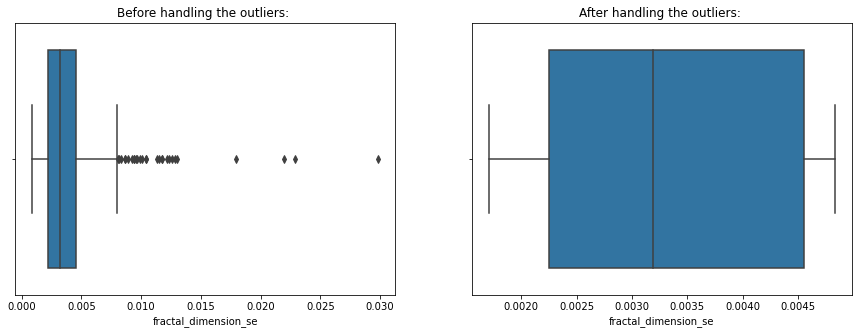

In [56]:
handle_outliers(df, "fractal_dimension_se")

### worst column:


In [57]:
detect_outliers(df, "perimeter_worst")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,M,17.08,22.44,111.8,918.6,0.10630,0.1428,0.1508,0.08465,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
180,873592,M,17.08,21.87,111.8,918.6,0.10750,0.1428,0.1508,0.08465,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
265,88995002,M,17.08,22.44,111.8,918.6,0.09469,0.1143,0.1367,0.08465,...,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
352,899987,M,17.08,17.46,111.8,918.6,0.10750,0.1428,0.1508,0.08465,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,911296202,M,17.08,22.44,111.8,918.6,0.10750,0.1428,0.1508,0.08465,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
503,915143,M,17.08,19.83,111.8,918.6,0.09342,0.1275,0.1508,0.08465,...,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


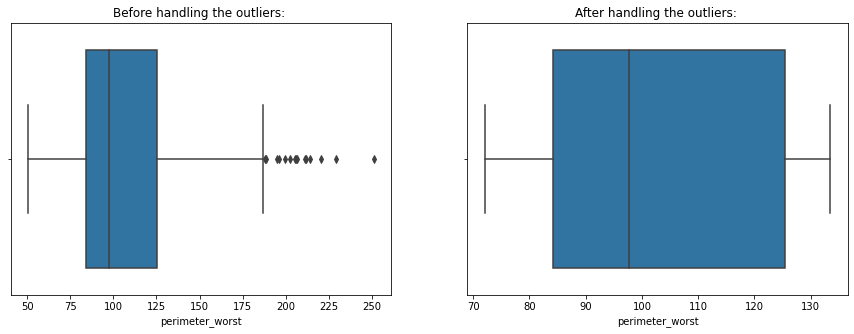

In [58]:
handle_outliers(df, "perimeter_worst")

In [59]:
detect_outliers(df, "texture_worst")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
219,88119002,M,17.08,22.44,111.8,918.6,0.08420,0.1130,0.1145,0.06637,...,27.90,45.41,133.5,2477.0,0.1408,0.4097,0.3995,0.1625,0.2713,0.07568
239,88330202,M,17.08,22.44,111.8,918.6,0.09812,0.1298,0.1417,0.08465,...,22.51,44.87,133.5,1408.0,0.1365,0.3735,0.3241,0.2066,0.2853,0.08496
259,88725602,M,15.53,22.44,103.7,744.9,0.10630,0.1428,0.1508,0.08399,...,18.49,49.54,126.3,1035.0,0.1883,0.5564,0.5703,0.2014,0.3512,0.12040
265,88995002,M,17.08,22.44,111.8,918.6,0.09469,0.1143,0.1367,0.08465,...,32.49,47.16,133.5,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


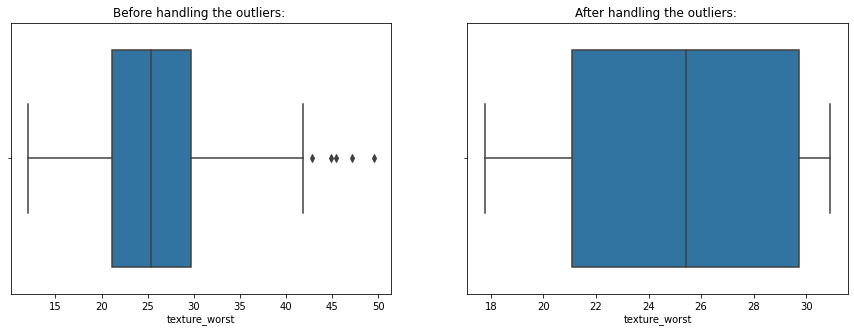

In [60]:
handle_outliers(df, "texture_worst")

In [61]:
detect_outliers(df, "radius_worst")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
180,873592,M,17.08,21.87,111.8,918.6,0.10750,0.1428,0.1508,0.08465,...,33.12,30.92,133.5,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
236,88299702,M,17.08,22.44,111.8,918.6,0.09509,0.1428,0.1508,0.08465,...,31.01,30.92,133.5,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
265,88995002,M,17.08,22.44,111.8,918.6,0.09469,0.1143,0.1367,0.08465,...,32.49,30.92,133.5,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
352,899987,M,17.08,17.46,111.8,918.6,0.10750,0.1428,0.1508,0.08465,...,33.13,23.58,133.5,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,911296202,M,17.08,22.44,111.8,918.6,0.10750,0.1428,0.1508,0.08465,...,36.04,30.92,133.5,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
503,915143,M,17.08,19.83,111.8,918.6,0.09342,0.1275,0.1508,0.08465,...,30.79,23.87,133.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


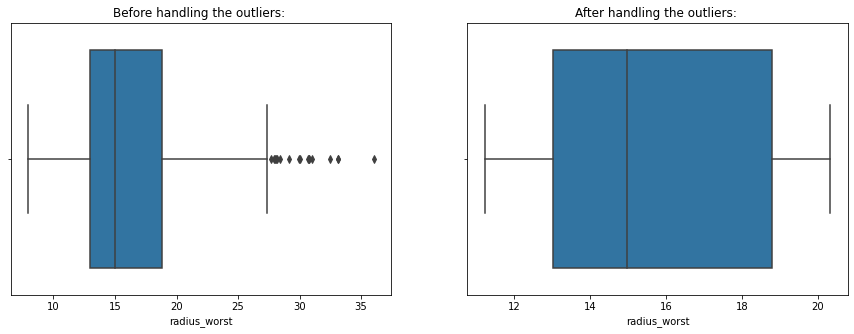

In [62]:
handle_outliers(df, "radius_worst")

In [63]:
detect_outliers(df, "area_worst")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
23,851509,M,17.08,22.44,111.8,918.6,0.09428,0.10220,0.1097,0.08465,...,20.33,30.92,133.5,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
180,873592,M,17.08,21.87,111.8,918.6,0.10750,0.14280,0.1508,0.08465,...,20.33,30.92,133.5,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
236,88299702,M,17.08,22.44,111.8,918.6,0.09509,0.14280,0.1508,0.08465,...,20.33,30.92,133.5,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
265,88995002,M,17.08,22.44,111.8,918.6,0.09469,0.11430,0.1367,0.08465,...,20.33,30.92,133.5,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
339,89812,M,17.08,22.44,111.8,918.6,0.10690,0.12830,0.1508,0.08465,...,20.33,30.73,133.5,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
352,899987,M,17.08,17.46,111.8,918.6,0.10750,0.14280,0.1508,0.08465,...,20.33,23.58,133.5,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
368,9011971,M,17.08,17.25,111.8,918.6,0.09384,0.08562,0.1168,0.08465,...,20.33,26.44,133.5,3143.0,0.1363,0.1628,0.2861,0.1820,0.2510,0.06494
461,911296202,M,17.08,22.44,111.8,918.6,0.10750,0.14280,0.1508,0.08465,...,20.33,30.92,133.5,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
503,915143,M,17.08,19.83,111.8,918.6,0.09342,0.12750,0.1508,0.08465,...,20.33,23.87,133.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277
521,91762702,M,17.08,21.60,111.8,918.6,0.10300,0.14280,0.1508,0.08465,...,20.33,26.93,133.5,2642.0,0.1342,0.4188,0.4658,0.2475,0.3157,0.09671


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


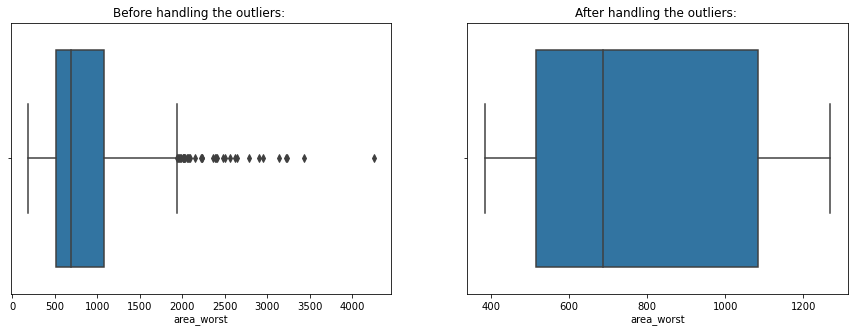

In [64]:
handle_outliers(df, "area_worst")

In [65]:
detect_outliers(df, "smoothness_worst")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.42,20.38,77.58,386.1,0.1075,0.1428,0.1508,0.08465,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
203,87880,M,13.81,22.44,91.56,597.8,0.1075,0.1428,0.1508,0.08465,...,19.20,30.92,128.50,1153.0,0.2226,0.5209,0.4646,0.2013,0.4432,0.1086
379,9013838,M,11.08,18.83,73.30,361.6,0.1075,0.1428,0.1508,0.06367,...,13.24,30.92,91.76,508.1,0.2184,0.9379,0.8402,0.2524,0.4154,0.1403


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


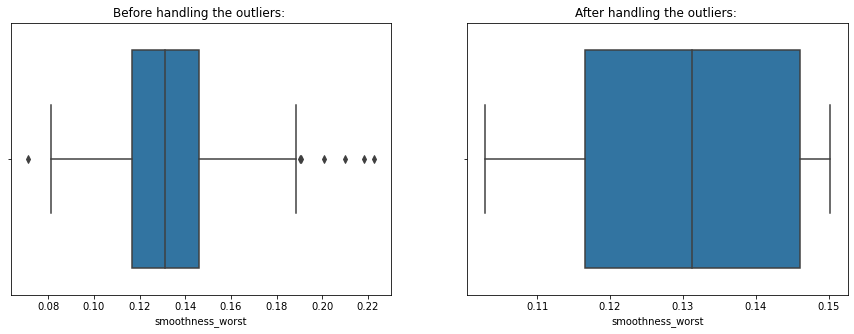

In [66]:
handle_outliers(df, "smoothness_worst")

In [67]:
detect_outliers(df, "compactness_worst")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.42,20.38,77.58,386.1,0.10750,0.1428,0.1508,0.08465,...,14.91,26.50,98.87,567.7,0.1502,0.8663,0.6869,0.2575,0.6638,0.1730
9,84501001,M,12.46,22.44,83.97,475.9,0.10750,0.1428,0.1508,0.08465,...,15.09,30.92,97.65,711.4,0.1502,1.0580,1.1050,0.2210,0.4366,0.2075
14,84667401,M,13.73,22.44,93.60,578.3,0.10750,0.1428,0.1508,0.08025,...,15.03,30.92,108.80,697.7,0.1502,0.7725,0.6943,0.2208,0.3596,0.1431
42,855625,M,17.08,22.44,111.80,918.6,0.09081,0.1428,0.1508,0.08465,...,20.33,30.92,133.50,1269.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.1038
72,859717,M,17.08,22.44,111.80,918.6,0.10710,0.1428,0.1508,0.07944,...,20.33,30.92,133.50,1269.0,0.1502,0.7394,0.6566,0.1899,0.3313,0.1339
181,873593,M,17.08,22.44,111.80,918.6,0.10750,0.1428,0.1508,0.08465,...,20.33,30.92,133.50,1269.0,0.1491,0.7584,0.6780,0.2903,0.4098,0.1284
190,874858,M,14.22,22.44,94.37,609.9,0.10750,0.1428,0.1508,0.06618,...,15.74,30.92,106.40,762.4,0.1502,0.9327,0.8488,0.1772,0.5166,0.1446
379,9013838,M,11.08,18.83,73.30,361.6,0.10750,0.1428,0.1508,0.06367,...,13.24,30.92,91.76,508.1,0.1502,0.9379,0.8402,0.2524,0.4154,0.1403
562,925622,M,15.22,22.44,103.40,716.9,0.10480,0.1428,0.1508,0.08465,...,17.52,30.92,128.70,915.0,0.1417,0.7917,1.1700,0.2356,0.4089,0.1409
567,927241,M,17.08,22.44,111.80,918.6,0.10750,0.1428,0.1508,0.08465,...,20.33,30.92,133.50,1269.0,0.1502,0.8681,0.9387,0.2650,0.4087,0.1240


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


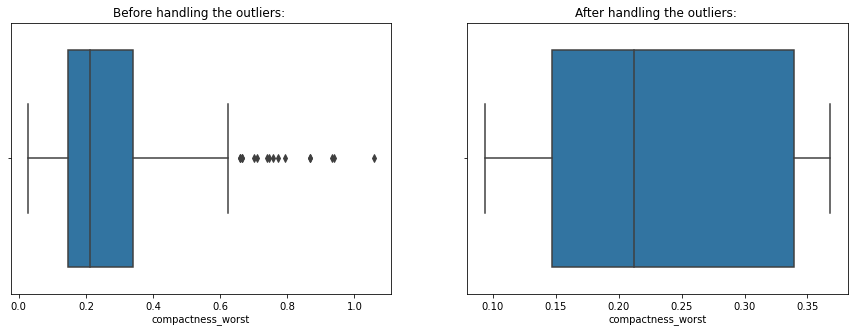

In [68]:
handle_outliers(df, "compactness_worst")

In [69]:
detect_outliers(df, "concavity_worst")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
9,84501001,M,12.46,22.44,83.97,475.9,0.10750,0.1428,0.1508,0.08465,...,15.09,30.92,97.65,711.4,0.1502,0.3682,1.1050,0.2210,0.4366,0.20750
68,859471,B,10.26,17.33,65.75,321.6,0.10660,0.1413,0.1508,0.04375,...,11.21,22.65,72.01,384.0,0.1482,0.3682,1.2520,0.1750,0.4228,0.11750
108,86355,M,17.08,19.67,111.80,918.6,0.10750,0.1428,0.1508,0.08465,...,20.33,28.01,133.50,1269.0,0.1502,0.3682,0.9608,0.2910,0.4055,0.09789
400,90439701,M,17.08,21.02,111.80,918.6,0.10750,0.1428,0.1508,0.08465,...,20.33,27.78,133.50,1269.0,0.1502,0.3682,0.9034,0.1964,0.3245,0.11980
430,907914,M,14.90,22.44,102.10,685.0,0.09947,0.1428,0.1508,0.08465,...,16.35,27.57,125.40,832.7,0.1419,0.3682,0.9019,0.2475,0.2866,0.11550
562,925622,M,15.22,22.44,103.40,716.9,0.10480,0.1428,0.1508,0.08465,...,17.52,30.92,128.70,915.0,0.1417,0.3682,1.1700,0.2356,0.4089,0.14090
567,927241,M,17.08,22.44,111.80,918.6,0.10750,0.1428,0.1508,0.08465,...,20.33,30.92,133.50,1269.0,0.1502,0.3682,0.9387,0.2650,0.4087,0.12400


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


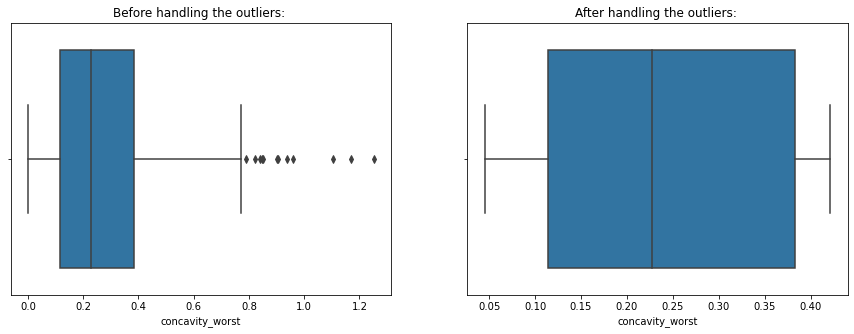

In [70]:
handle_outliers(df, "concavity_worst")

In [71]:
detect_outliers(df, "symmetry_worst")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.42,20.38,77.58,386.1,0.10750,0.14280,0.15080,0.08465,...,14.91,26.50,98.87,567.7,0.1502,0.3682,0.4211,0.2575,0.6638,0.17300
31,853612,M,11.84,18.70,77.93,440.6,0.10750,0.14280,0.12180,0.05182,...,16.82,28.12,119.40,888.7,0.1502,0.3682,0.4211,0.1546,0.4761,0.14020
35,854253,M,16.74,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,...,20.01,29.02,133.50,1229.0,0.1502,0.3682,0.4211,0.1813,0.4863,0.08633
78,8610862,M,17.08,22.44,111.80,918.6,0.10750,0.14280,0.15080,0.08465,...,20.33,30.92,133.50,1269.0,0.1502,0.3682,0.4211,0.2508,0.5440,0.09964
119,865128,M,17.08,20.01,111.80,918.6,0.08402,0.06722,0.07293,0.05596,...,20.33,27.83,129.20,1261.0,0.1072,0.1202,0.2249,0.1185,0.4882,0.06111
146,869691,M,11.80,16.58,78.99,432.0,0.10750,0.14280,0.15080,0.07415,...,13.74,26.38,91.93,591.7,0.1385,0.3682,0.4211,0.1865,0.5774,0.10300
190,874858,M,14.22,22.44,94.37,609.9,0.10750,0.14280,0.15080,0.06618,...,15.74,30.92,106.40,762.4,0.1502,0.3682,0.4211,0.1772,0.5166,0.14460
323,895100,M,17.08,21.51,111.80,918.6,0.10750,0.14280,0.15080,0.08465,...,20.33,30.92,133.50,1269.0,0.1502,0.3682,0.4211,0.2685,0.5558,0.10240
370,9012315,M,16.35,22.44,109.00,840.4,0.09742,0.14280,0.15080,0.08465,...,19.38,30.92,129.30,1165.0,0.1415,0.3682,0.4211,0.2248,0.4824,0.09614


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


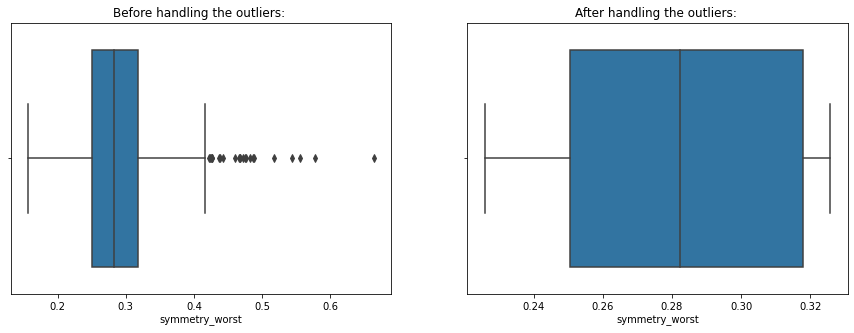

In [72]:
handle_outliers(df, "symmetry_worst")

In [73]:
detect_outliers(df, "fractal_dimension_worst")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.42,20.38,77.58,386.1,0.10750,0.1428,0.1508,0.08465,...,14.91,26.50,98.87,567.7,0.1502,0.3682,0.4211,0.25750,0.3258,0.1730
9,84501001,M,12.46,22.44,83.97,475.9,0.10750,0.1428,0.1508,0.08465,...,15.09,30.92,97.65,711.4,0.1502,0.3682,0.4211,0.22100,0.3258,0.2075
14,84667401,M,13.73,22.44,93.60,578.3,0.10750,0.1428,0.1508,0.08025,...,15.03,30.92,108.80,697.7,0.1502,0.3682,0.4211,0.22080,0.3258,0.1431
31,853612,M,11.84,18.70,77.93,440.6,0.10750,0.1428,0.1218,0.05182,...,16.82,28.12,119.40,888.7,0.1502,0.3682,0.4211,0.15460,0.3258,0.1402
105,863030,M,13.11,15.56,87.21,530.2,0.10750,0.1428,0.1508,0.08465,...,16.31,22.40,106.40,827.2,0.1502,0.3682,0.4211,0.19860,0.3147,0.1405
151,871001502,B,10.26,20.70,65.75,321.6,0.09405,0.1305,0.1321,0.02168,...,11.21,29.72,72.01,384.0,0.1502,0.3682,0.4211,0.07879,0.3258,0.1486
190,874858,M,14.22,22.44,94.37,609.9,0.10750,0.1428,0.1508,0.06618,...,15.74,30.92,106.40,762.4,0.1502,0.3682,0.4211,0.17720,0.3258,0.1446
379,9013838,M,11.08,18.83,73.30,361.6,0.10750,0.1428,0.1508,0.06367,...,13.24,30.92,91.76,508.1,0.1502,0.3682,0.4211,0.25240,0.3258,0.1403
562,925622,M,15.22,22.44,103.40,716.9,0.10480,0.1428,0.1508,0.08465,...,17.52,30.92,128.70,915.0,0.1417,0.3682,0.4211,0.23560,0.3258,0.1409


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


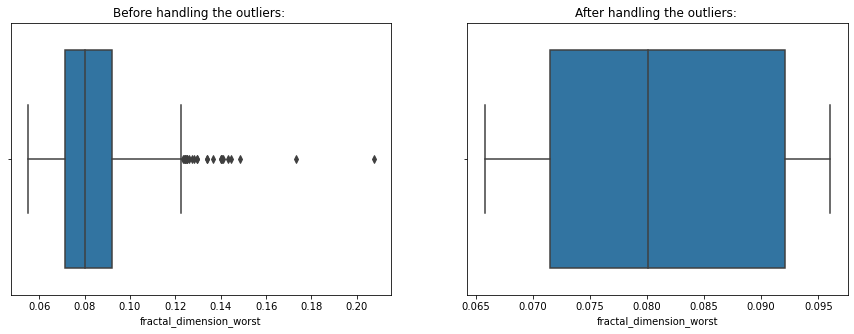

In [74]:
handle_outliers(df, "fractal_dimension_worst")

### Now, time to insure that we have NO outliers:

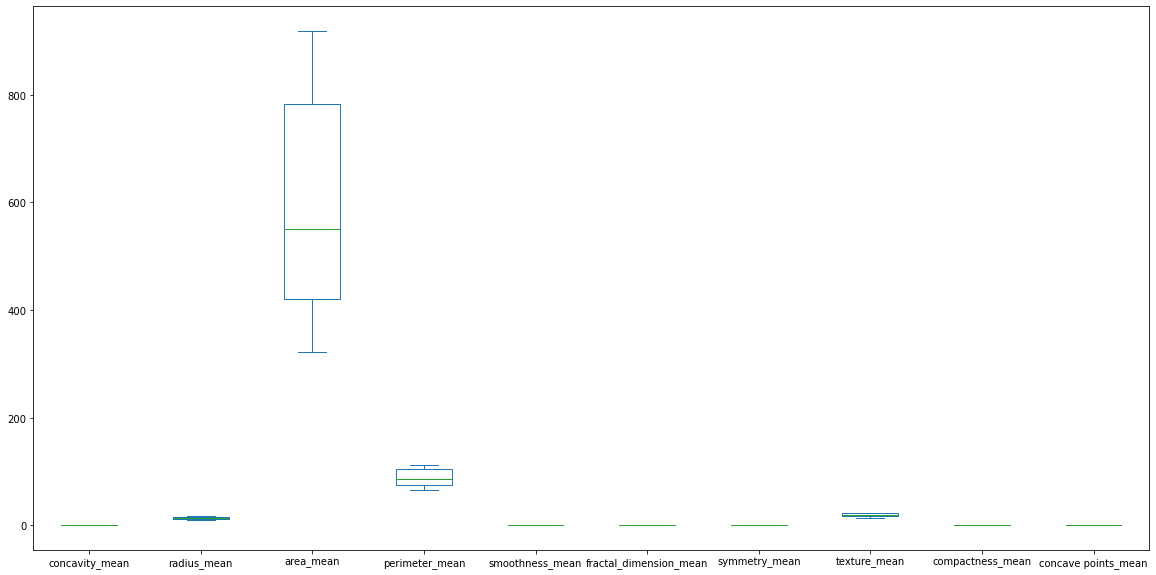

In [75]:
df[{"texture_mean", "radius_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean",
  "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean" }].plot(kind = "box", figsize=(20,10))
plt.show()

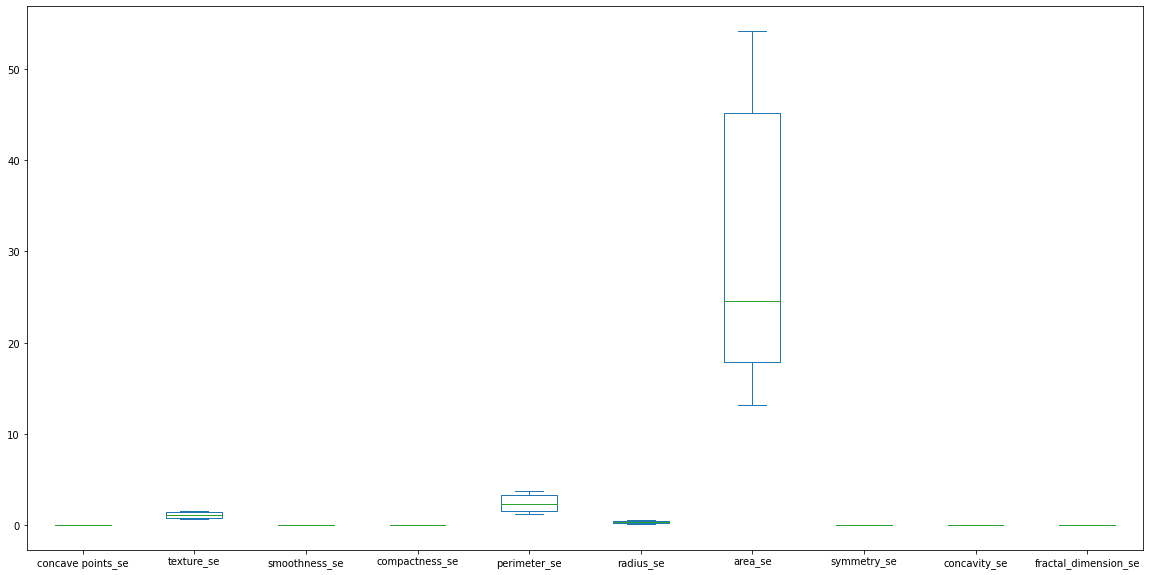

In [76]:
df[{"texture_se", "radius_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se",
  "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se" }].plot(kind = "box", figsize=(20,10))
plt.show()

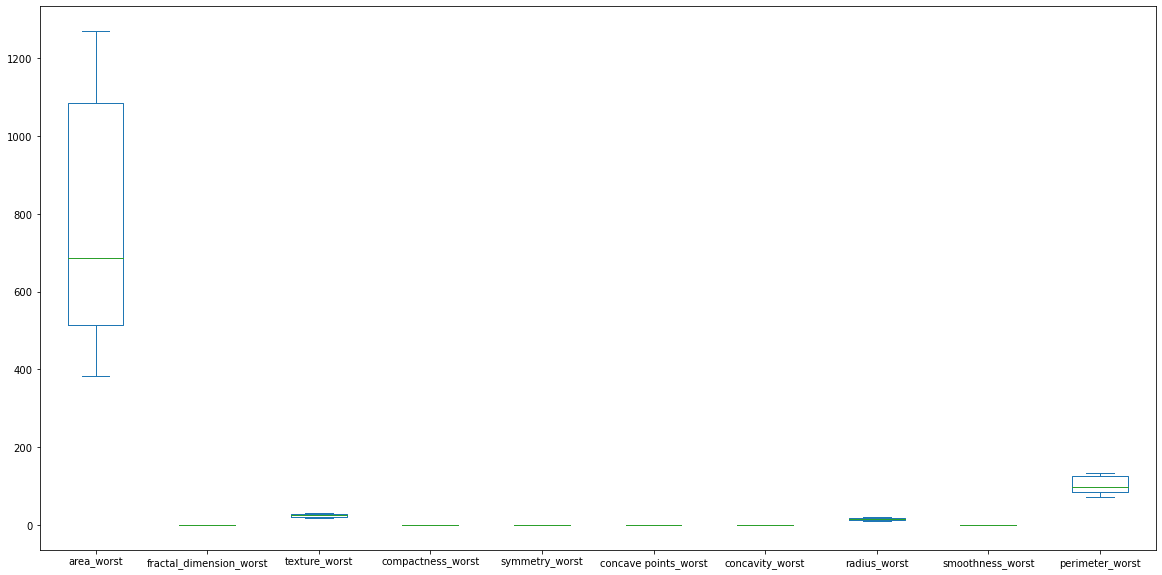

In [77]:
df[{"texture_worst", "radius_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst",
  "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst" }].plot(kind = "box", figsize=(20,10))
plt.show()

### OUR Dataset has no outliers.

## Correlation coeffecient:
#### to know more about the relationship between variables


In [78]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.08,14.07,111.80,918.6,0.10750,0.14280,0.1508,0.08465,...,20.33,17.76,133.50,1269.0,0.1502,0.3682,0.4211,0.2654,0.3258,0.09606
1,842517,M,17.08,17.77,111.80,918.6,0.08474,0.07864,0.0869,0.07017,...,20.33,23.41,133.50,1269.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,17.08,21.25,111.80,918.6,0.10750,0.14280,0.1508,0.08465,...,20.33,25.53,133.50,1269.0,0.1444,0.3682,0.4211,0.2430,0.3258,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.10750,0.14280,0.1508,0.08465,...,14.91,26.50,98.87,567.7,0.1502,0.3682,0.4211,0.2575,0.3258,0.09606
4,84358402,M,17.08,14.34,111.80,918.6,0.10030,0.13280,0.1508,0.08465,...,20.33,17.76,133.50,1269.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [79]:
data = df.iloc[:,2:20].copy()
data = pd.DataFrame(data)
data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se
0,17.08,14.07,111.80,918.6,0.10750,0.14280,0.15080,0.08465,0.2009,0.06766,0.5462,0.9053,3.769,54.16,0.006399,0.036330,0.046440,0.015830
1,17.08,17.77,111.80,918.6,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,54.16,0.005225,0.013080,0.018600,0.013400
2,17.08,21.25,111.80,918.6,0.10750,0.14280,0.15080,0.08465,0.2009,0.05999,0.5462,0.7869,3.769,54.16,0.006150,0.036330,0.038320,0.015830
3,11.42,20.38,77.58,386.1,0.10750,0.14280,0.15080,0.08465,0.2009,0.06766,0.4956,1.1560,3.445,27.23,0.008835,0.036330,0.046440,0.015830
4,17.08,14.34,111.80,918.6,0.10030,0.13280,0.15080,0.08465,0.1809,0.05883,0.5462,0.7813,3.769,54.16,0.008835,0.024610,0.046440,0.015830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,17.08,22.39,111.80,918.6,0.10750,0.11590,0.15080,0.08465,0.1726,0.05623,0.5462,1.2560,3.769,54.16,0.008835,0.028910,0.046440,0.015830
565,17.08,22.44,111.80,918.6,0.09780,0.10340,0.14400,0.08465,0.1752,0.05533,0.5462,1.5630,3.769,54.16,0.005769,0.024230,0.039500,0.015830
566,16.60,22.44,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.036330,0.046440,0.015570
567,17.08,22.44,111.80,918.6,0.10750,0.14280,0.15080,0.08465,0.2009,0.06766,0.5462,1.5630,3.769,54.16,0.006522,0.036330,0.046440,0.015830


<AxesSubplot:>

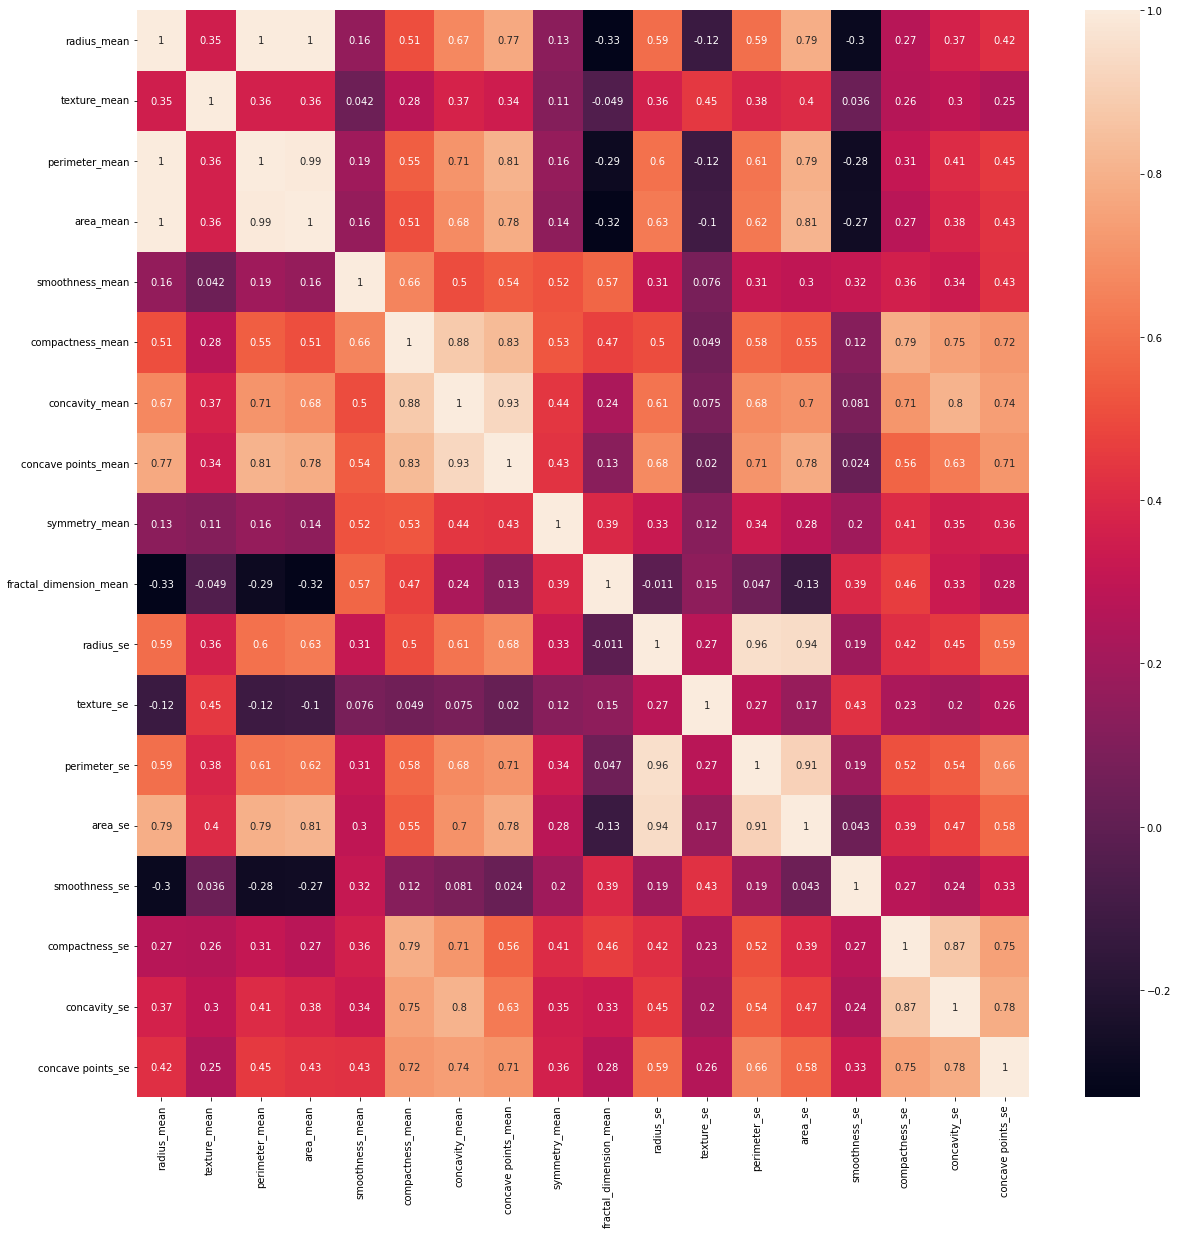

In [80]:
# sns.heatmap(coeff)
plt.figure(figsize=(20, 20))
ax = sns.heatmap(data.corr(), annot=True)
ax

In [81]:
# sns.pairplot(df, hue='diagnosis', size=2.5);

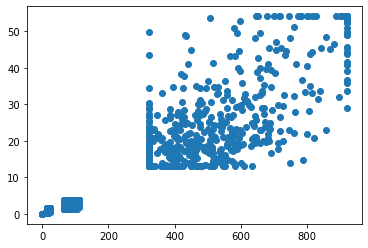

In [82]:
x = df.iloc[:,2:10]
y = df.iloc[:,12:20]    
plt.scatter(x, y)

Text(0.5, 1.0, 'texture_se: ')

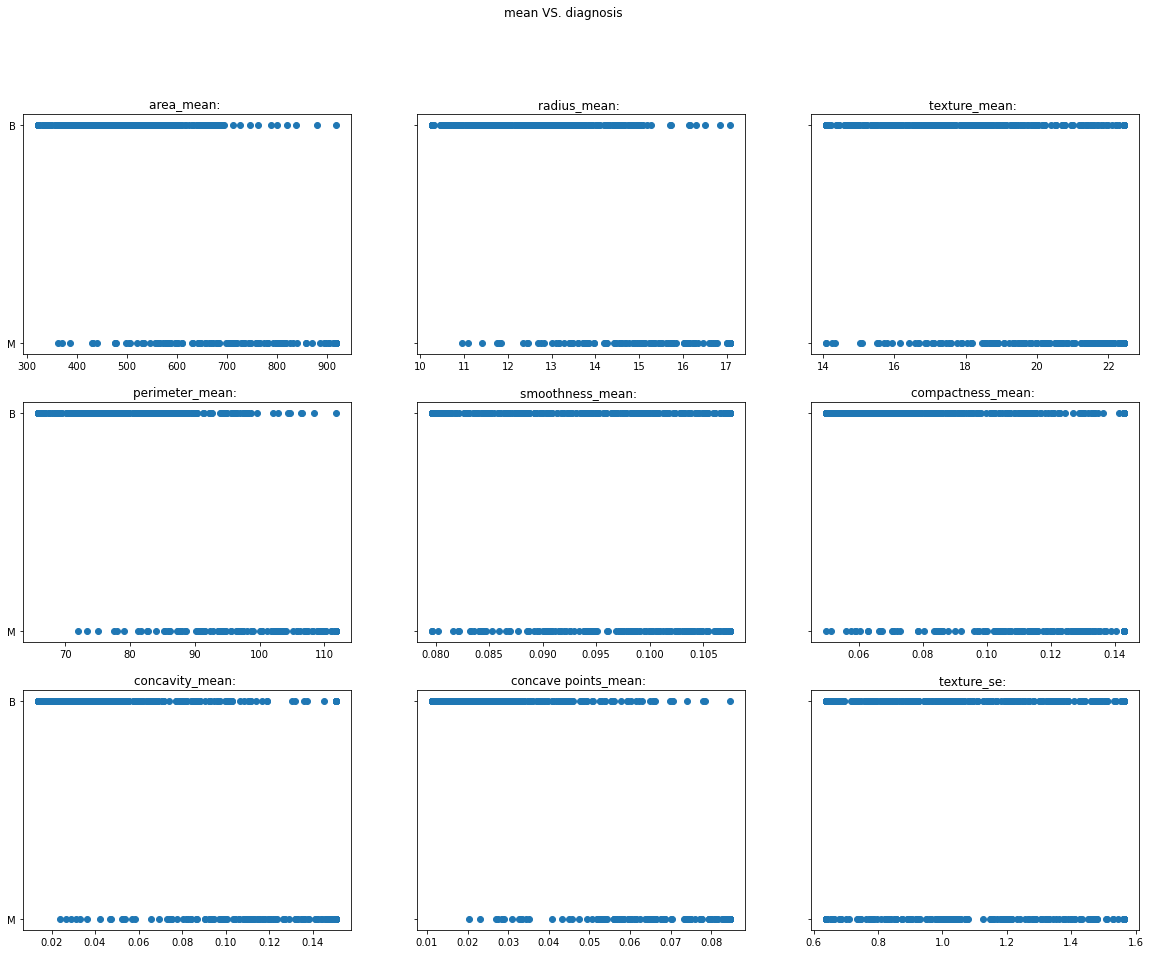

In [83]:
y = df["diagnosis"]

fig, axes = plt.subplots(3, 3, figsize=(20, 15), sharey=True)
fig.suptitle("mean VS. diagnosis")
## first row
axes[0,0].scatter(df["area_mean"],y)
axes[0,0].set_title("area_mean: ")

axes[0,1].scatter(df["radius_mean"],y)
axes[0,1].set_title("radius_mean: ")

axes[0,2].scatter(df["texture_mean"],y)
axes[0,2].set_title("texture_mean: ")
## second row
axes[1,0].scatter(df["perimeter_mean"],y)
axes[1,0].set_title("perimeter_mean: ")

axes[1,1].scatter(df["smoothness_mean"],y)
axes[1,1].set_title("smoothness_mean: ")

axes[1,2].scatter(df["compactness_mean"],y)
axes[1,2].set_title("compactness_mean: ")
## Thied row
axes[2,0].scatter(df["concavity_mean"],y)
axes[2,0].set_title("concavity_mean: ")

axes[2,1].scatter(df["concave points_mean"],y)
axes[2,1].set_title("concave points_mean: ")

axes[2,2].scatter(df["texture_se"],y)
axes[2,2].set_title("texture_se: ")

Text(0.5, 1.0, 'area_worst: ')

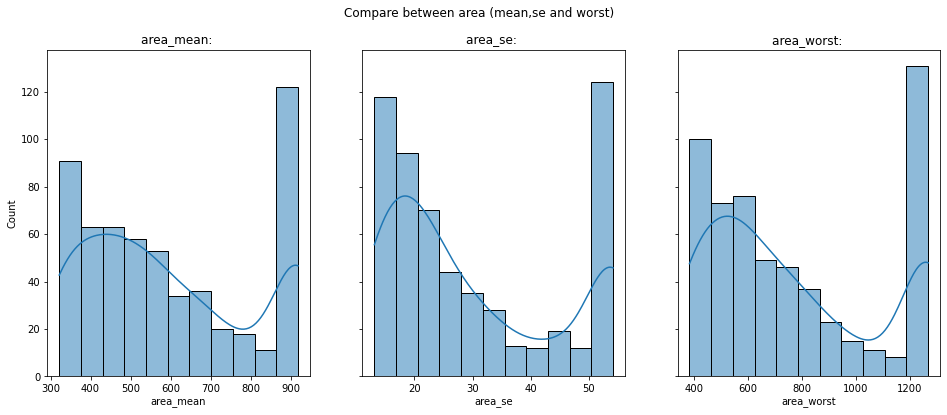

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharey=True)
fig.suptitle('Compare between area (mean,se and worst)')

sns.histplot(data = df, x ='area_mean', kde = True, ax = axes[0])
axes[0].set_title("area_mean: ")

sns.histplot(data = df, x ='area_se', kde = True, ax = axes[1])
axes[1].set_title("area_se: ")

sns.histplot(data = df, x ='area_worst', kde = True, ax = axes[2])
axes[2].set_title("area_worst: ")

Text(0.5, 1.0, 'concavity_worst: ')

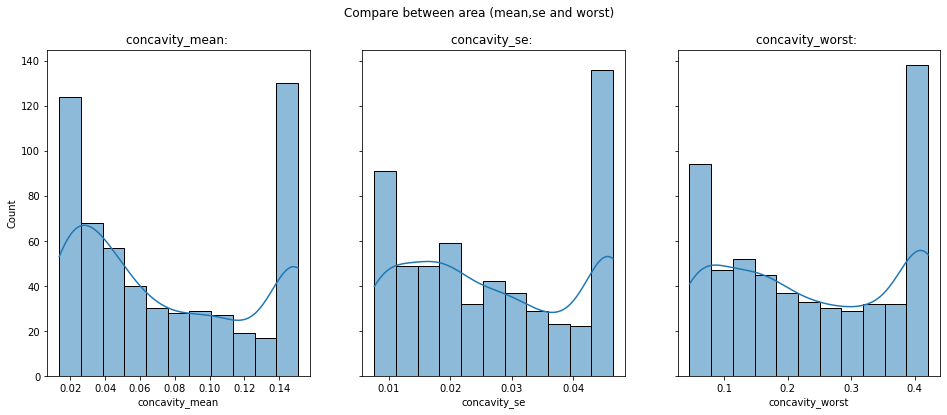

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharey=True)
fig.suptitle('Compare between area (mean,se and worst)')

sns.histplot(data = df, x ='concavity_mean', kde = True, ax = axes[0])
axes[0].set_title("concavity_mean: ")

sns.histplot(data = df, x ='concavity_se', kde = True, ax = axes[1])
axes[1].set_title("concavity_se: ")

sns.histplot(data = df, x ='concavity_worst', kde = True, ax = axes[2])
axes[2].set_title("concavity_worst: ")

<AxesSubplot:xlabel='diagnosis', ylabel='Count'>

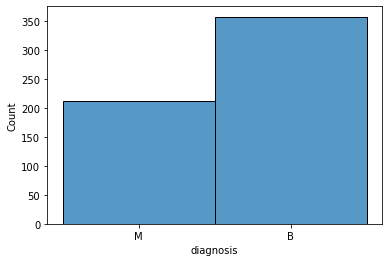

In [86]:
sns.histplot(data=df,x='diagnosis',bins=150)

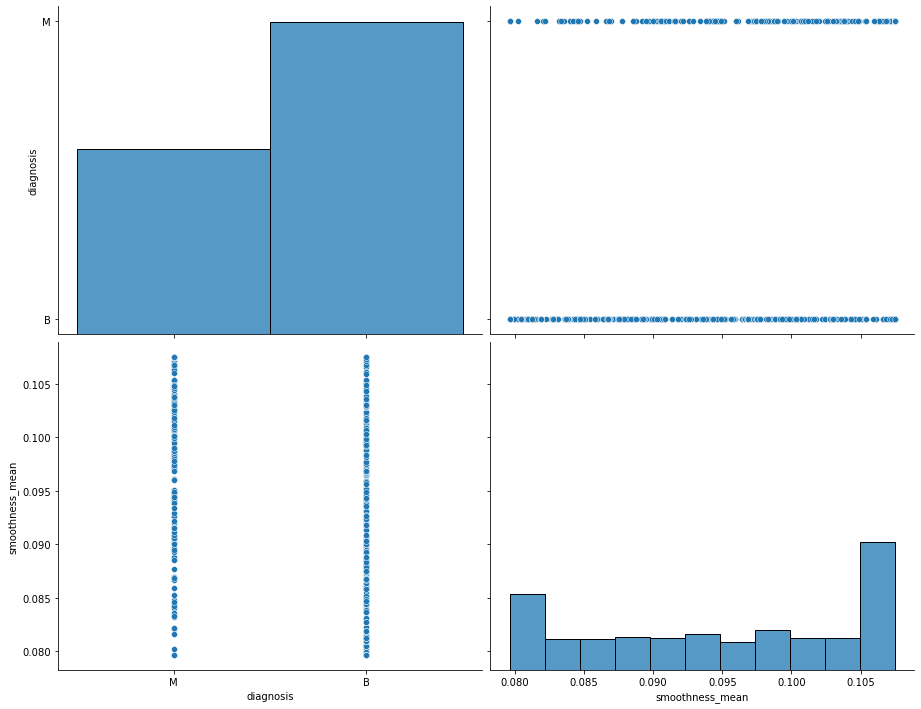

In [87]:
sns.pairplot(df, vars = ['diagnosis', 'smoothness_mean'], height=5, aspect=1.3)

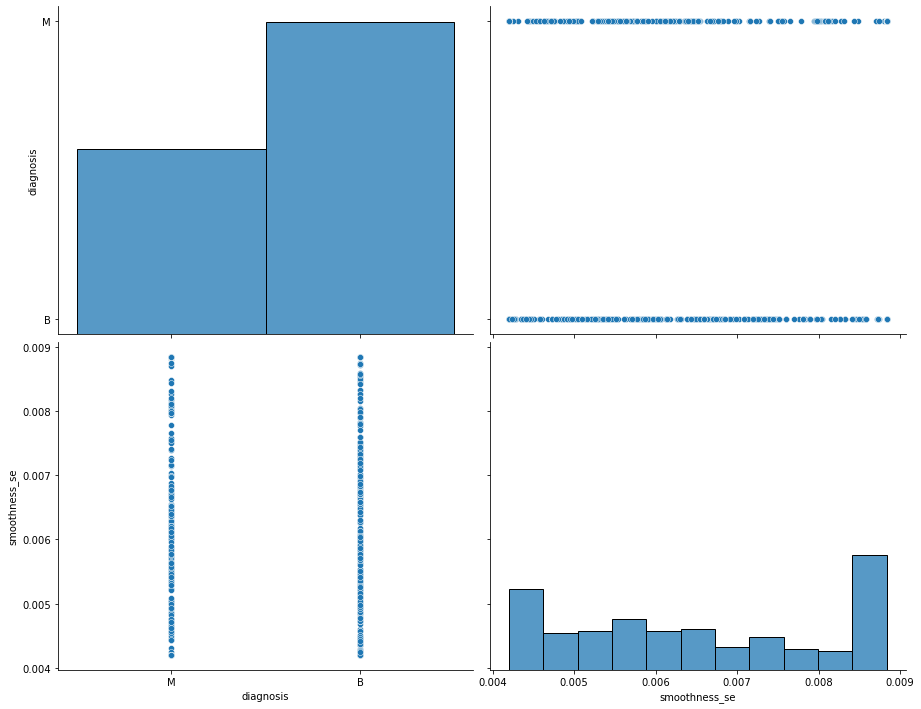

In [88]:
sns.pairplot(df, vars = ['diagnosis', 'smoothness_se'], height=5, aspect=1.3)

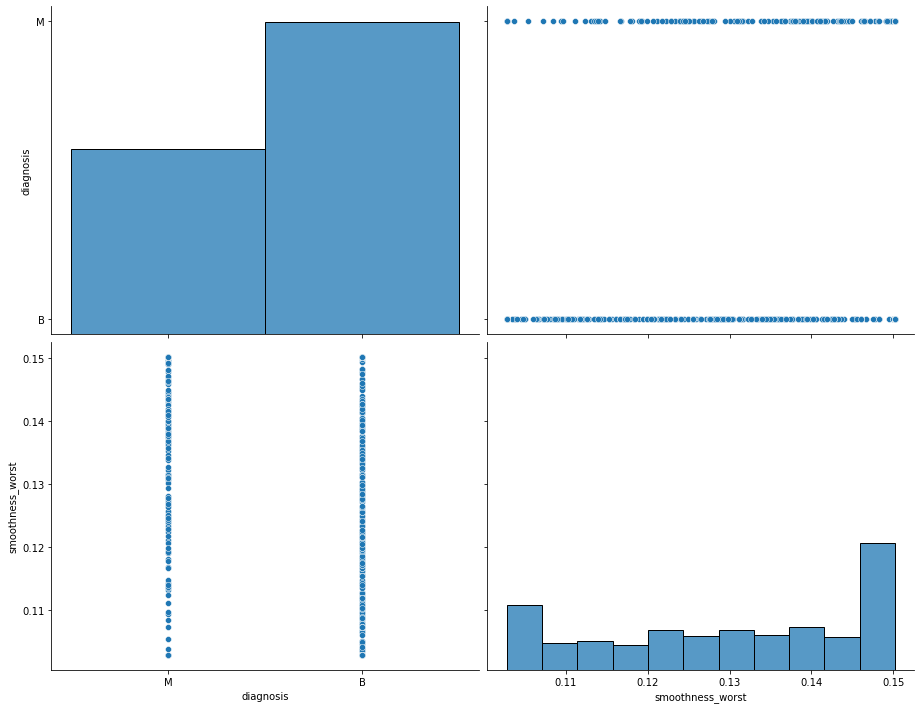

In [89]:
sns.pairplot(df, vars = ['diagnosis', 'smoothness_worst'], height=5, aspect=1.3)

# Applying models:


In [90]:
x = df.drop(columns = ['diagnosis', 'id'])
y = df[['diagnosis']]

In [91]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.08,14.07,111.80,918.6,0.10750,0.14280,0.15080,0.08465,0.2009,0.06766,...,20.33,17.76,133.50,1269.0,0.1502,0.36820,0.42110,0.2654,0.3258,0.09606
1,17.08,17.77,111.80,918.6,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,20.33,23.41,133.50,1269.0,0.1238,0.18660,0.24160,0.1860,0.2750,0.08902
2,17.08,21.25,111.80,918.6,0.10750,0.14280,0.15080,0.08465,0.2009,0.05999,...,20.33,25.53,133.50,1269.0,0.1444,0.36820,0.42110,0.2430,0.3258,0.08758
3,11.42,20.38,77.58,386.1,0.10750,0.14280,0.15080,0.08465,0.2009,0.06766,...,14.91,26.50,98.87,567.7,0.1502,0.36820,0.42110,0.2575,0.3258,0.09606
4,17.08,14.34,111.80,918.6,0.10030,0.13280,0.15080,0.08465,0.1809,0.05883,...,20.33,17.76,133.50,1269.0,0.1374,0.20500,0.40000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,17.08,22.39,111.80,918.6,0.10750,0.11590,0.15080,0.08465,0.1726,0.05623,...,20.33,26.40,133.50,1269.0,0.1410,0.21130,0.41070,0.2216,0.2258,0.07115
565,17.08,22.44,111.80,918.6,0.09780,0.10340,0.14400,0.08465,0.1752,0.05533,...,20.33,30.92,133.50,1269.0,0.1166,0.19220,0.32150,0.1628,0.2572,0.06637
566,16.60,22.44,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.98,30.92,126.70,1124.0,0.1139,0.30940,0.34030,0.1418,0.2258,0.07820
567,17.08,22.44,111.80,918.6,0.10750,0.14280,0.15080,0.08465,0.2009,0.06766,...,20.33,30.92,133.50,1269.0,0.1502,0.36820,0.42110,0.2650,0.3258,0.09606


In [92]:
y

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [93]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.25,shuffle = True ,random_state = 0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((426, 30), (143, 30), (426, 1), (143, 1))

### to compare between x_train and x_test score:

In [94]:
def compare (y_train, y_test):
    
    fig, axes = plt.subplots(1,2, figsize = (15,5))
    sns.distplot(y_train , ax = axes[0]) 
    sns.distplot(y_test, ax = axes[1]) 
    
    axes[0].set_title("Training data: ")
    axes[1].set_title("Testing data: ")
    
    return plt.show()

## Applying (PCA):

In [95]:
## Feature scaling:
sc = StandardScaler()
 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [96]:
pca = PCA(n_components =2)
 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
 
explained_variance = pca.explained_variance_ratio_

In [97]:
explained_variance

array([0.46408352, 0.17798613])

In [98]:
x_train

array([[-3.62172544e+00,  2.55684590e-01],
       [-4.09607320e+00, -1.12552366e+00],
       [ 4.26645656e+00,  3.19478653e+00],
       [-4.09320015e+00,  3.76442332e+00],
       [-4.22253741e-01,  4.08133387e+00],
       [-4.17940900e+00,  5.38942169e-01],
       [-3.88051769e+00,  2.62862210e+00],
       [-4.41224676e-01, -1.62140912e+00],
       [ 2.79665669e+00, -1.73070009e+00],
       [ 1.05658575e+00, -6.04374846e+00],
       [-7.63254451e-01,  3.19821384e-01],
       [-4.37872958e+00, -2.07159175e+00],
       [ 3.30814268e+00, -1.07848294e+00],
       [-2.09779020e+00,  1.54750347e+00],
       [-3.63658519e-01,  1.53029531e+00],
       [-4.80733317e+00,  2.62217464e+00],
       [ 6.29372365e+00, -1.22502231e+00],
       [ 6.14190963e+00,  1.21468252e+00],
       [-4.86400322e+00,  9.73407813e-01],
       [ 2.88338592e-01, -3.53069119e+00],
       [ 4.83186276e+00,  1.93169942e+00],
       [-4.19082481e+00,  6.77726009e-01],
       [ 4.75984210e+00,  9.81611996e-01],
       [ 3.

In [99]:
x_test

array([[ 3.79142612e+00, -1.97555270e+00],
       [-3.55341338e+00,  2.36029111e+00],
       [-3.94343104e+00,  3.46591214e+00],
       [-2.93649466e+00,  3.54561448e+00],
       [-4.54939194e+00,  1.70709249e+00],
       [-2.77898294e+00, -1.58320577e+00],
       [-8.71520345e-01, -2.28747225e+00],
       [-4.43646113e+00,  9.24031296e-03],
       [-4.08040082e+00, -2.57099816e+00],
       [-2.95558352e+00, -3.95868269e+00],
       [ 3.74428232e+00, -2.95372251e+00],
       [-1.32229216e+00,  2.24075940e+00],
       [-4.11048973e+00, -1.83166723e+00],
       [ 7.02359902e-01,  4.07049256e+00],
       [ 3.13266261e+00, -1.59933001e+00],
       [ 4.44290133e+00, -9.88846029e-01],
       [ 1.37401281e+00, -5.56077825e+00],
       [ 4.20359103e+00,  3.70735605e+00],
       [ 5.77178510e+00,  2.71376453e-01],
       [ 6.24116800e+00,  8.36076974e-01],
       [ 3.38507327e+00, -3.01521564e+00],
       [ 4.22854650e+00, -3.70370764e-01],
       [-1.22674149e+00, -6.85205324e-01],
       [-3.

# (1) Logistic Regression:

In [100]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
cl_pred = classifier.predict(x_test)

C:\Users\Salma\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [101]:
print(classification_report(y_test,cl_pred))

              precision    recall  f1-score   support

           B       0.97      0.93      0.95        90
           M       0.89      0.94      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



In [102]:
print('Training Score:', classifier.score(x_train,y_train)*100)
print("Testing score: ", accuracy_score(y_test,cl_pred)*100)

Training Score: 94.60093896713614
Testing score:  93.7062937062937


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


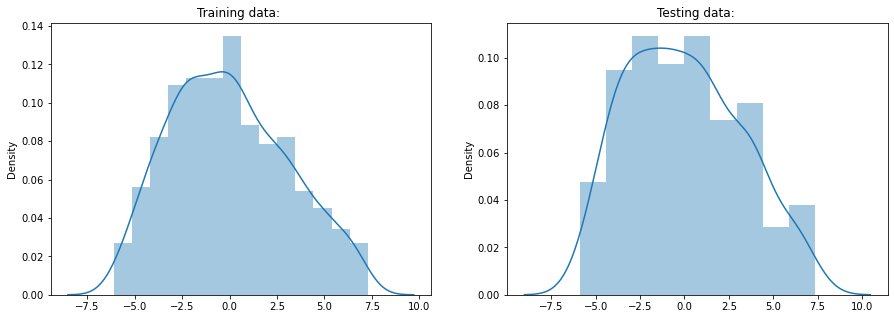

In [103]:
compare(x_train, x_test)

# (2) KNN:

In [104]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)

knn_pred = knn.predict(x_test)

C:\Users\Salma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [105]:
knn_pred 

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M'],
      dtype=object)

In [106]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           B       0.93      0.91      0.92        90
           M       0.85      0.89      0.87        53

    accuracy                           0.90       143
   macro avg       0.89      0.90      0.90       143
weighted avg       0.90      0.90      0.90       143



In [107]:
print('Training Score:', classifier.score(x_train,y_train)*100)
print("Testing score: ", accuracy_score(y_test,knn_pred)*100)

Training Score: 94.60093896713614
Testing score:  90.20979020979021


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


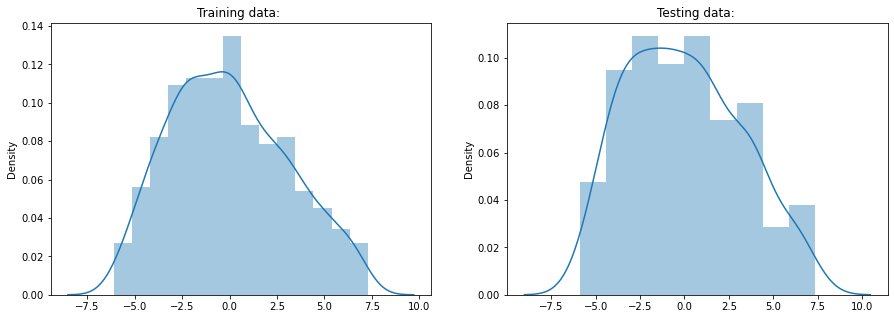

In [108]:
compare(x_train, x_test)

# (3) Guassian Naive Bayes:

In [109]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
 
# making predictions on the testing set
gnb_pred = gnb.predict(x_test)

C:\Users\Salma\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [110]:
gnb_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M'],
      dtype='<U1')

In [111]:
print(classification_report(y_test,gnb_pred))

              precision    recall  f1-score   support

           B       0.93      0.92      0.93        90
           M       0.87      0.89      0.88        53

    accuracy                           0.91       143
   macro avg       0.90      0.90      0.90       143
weighted avg       0.91      0.91      0.91       143



In [112]:
print('Training Score:', classifier.score(x_train,y_train)*100)
print("Testing score: ", accuracy_score(y_test,gnb_pred)*100)

Training Score: 94.60093896713614
Testing score:  90.9090909090909


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


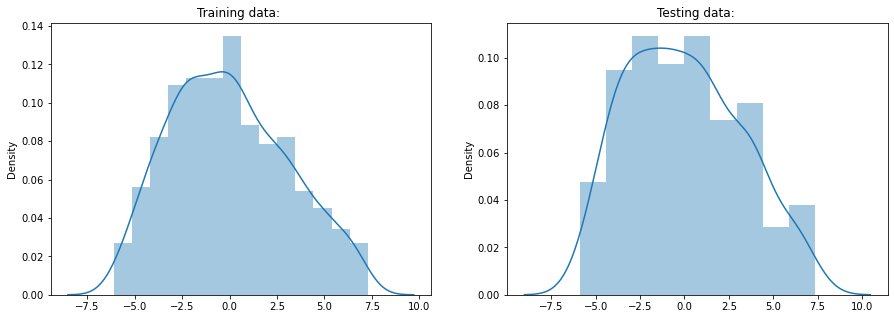

In [113]:
compare(x_train, x_test)

# (4) Support Vector Classifier:

In [114]:
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

C:\Users\Salma\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [115]:
svc_pred 

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M'],
      dtype=object)

In [116]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           B       0.95      0.93      0.94        90
           M       0.89      0.92      0.91        53

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



In [117]:
print('Training Score:', classifier.score(x_train,y_train)*100)
print("Testing score: ", accuracy_score(y_test,gnb_pred)*100)

Training Score: 94.60093896713614
Testing score:  90.9090909090909


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


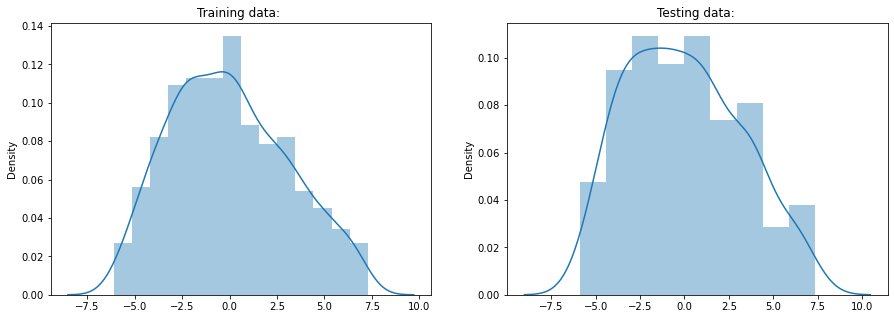

In [118]:
compare(x_train, x_test)

# (5) Random Forest Regressor:

In [119]:
def performance(model,X_train,Y_train,Y_pred,Y_test):
    print('Training Score:',model.score(X_train,Y_train)*100)
    print('Testing Score:',r2_score(Y_test,Y_pred)*100)
    print('Other Metrics In Testing Data: ')
    print('MSE:',mean_squared_error(Y_test,Y_pred))
    print('MAE:',mean_absolute_error(Y_test,Y_pred))

In [120]:
df.loc[(df['diagnosis']=='M'), 'diagnosis'] = 0
df.loc[(df['diagnosis']=='B'),'diagnosis'] = 1

In [121]:
X = df.drop(columns = ['diagnosis', 'id'])
Y = df[['diagnosis']]

In [122]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.08,14.07,111.80,918.6,0.10750,0.14280,0.15080,0.08465,0.2009,0.06766,...,20.33,17.76,133.50,1269.0,0.1502,0.36820,0.42110,0.2654,0.3258,0.09606
1,17.08,17.77,111.80,918.6,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,20.33,23.41,133.50,1269.0,0.1238,0.18660,0.24160,0.1860,0.2750,0.08902
2,17.08,21.25,111.80,918.6,0.10750,0.14280,0.15080,0.08465,0.2009,0.05999,...,20.33,25.53,133.50,1269.0,0.1444,0.36820,0.42110,0.2430,0.3258,0.08758
3,11.42,20.38,77.58,386.1,0.10750,0.14280,0.15080,0.08465,0.2009,0.06766,...,14.91,26.50,98.87,567.7,0.1502,0.36820,0.42110,0.2575,0.3258,0.09606
4,17.08,14.34,111.80,918.6,0.10030,0.13280,0.15080,0.08465,0.1809,0.05883,...,20.33,17.76,133.50,1269.0,0.1374,0.20500,0.40000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,17.08,22.39,111.80,918.6,0.10750,0.11590,0.15080,0.08465,0.1726,0.05623,...,20.33,26.40,133.50,1269.0,0.1410,0.21130,0.41070,0.2216,0.2258,0.07115
565,17.08,22.44,111.80,918.6,0.09780,0.10340,0.14400,0.08465,0.1752,0.05533,...,20.33,30.92,133.50,1269.0,0.1166,0.19220,0.32150,0.1628,0.2572,0.06637
566,16.60,22.44,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.98,30.92,126.70,1124.0,0.1139,0.30940,0.34030,0.1418,0.2258,0.07820
567,17.08,22.44,111.80,918.6,0.10750,0.14280,0.15080,0.08465,0.2009,0.06766,...,20.33,30.92,133.50,1269.0,0.1502,0.36820,0.42110,0.2650,0.3258,0.09606


In [123]:
Y

,diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [124]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,shuffle = True ,random_state = 404)
Y_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((426, 1), (143, 30), (426, 1), (143, 1))

In [125]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train.values.ravel())

#The predicted data
rf_pred = rf.predict(X_test)

In [126]:
rf_pred

array([0.99, 1.  , 0.  , 0.  , 0.  , 1.  , 0.97, 0.  , 0.38, 1.  , 0.55,
       0.02, 0.  , 1.  , 0.99, 1.  , 0.  , 1.  , 0.06, 0.  , 0.99, 0.99,
       1.  , 0.99, 0.96, 0.39, 0.46, 0.91, 1.  , 0.99, 0.01, 1.  , 1.  ,
       0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 0.64, 1.  , 0.42, 0.05, 0.96,
       1.  , 0.  , 1.  , 1.  , 0.91, 1.  , 1.  , 1.  , 1.  , 1.  , 0.  ,
       0.98, 0.56, 0.  , 0.04, 0.  , 0.49, 0.06, 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 0.65, 1.  , 0.03, 1.  , 0.99, 1.  , 0.05, 0.01, 0.  ,
       0.25, 1.  , 1.  , 0.  , 0.95, 0.45, 0.  , 1.  , 1.  , 0.12, 0.  ,
       0.95, 0.94, 0.  , 1.  , 0.  , 0.89, 1.  , 0.  , 0.  , 0.  , 1.  ,
       1.  , 1.  , 0.13, 0.14, 1.  , 0.  , 0.02, 1.  , 0.48, 0.08, 0.22,
       0.96, 1.  , 0.27, 1.  , 0.  , 0.25, 0.  , 0.  , 0.99, 0.65, 0.41,
       1.  , 0.  , 1.  , 0.18, 0.13, 1.  , 0.87, 0.  , 1.  , 0.03, 1.  ,
       0.05, 0.99, 1.  , 0.4 , 1.  , 1.  , 1.  , 0.  , 0.92, 1.  , 0.64])

In [127]:
performance(rf,X_train,Y_train,rf_pred,Y_test)

Training Score: 98.02246347642838
Testing Score: 81.25311363636362
Other Metrics In Testing Data: 
MSE: 0.04437132867132867
MAE: 0.08832167832167832


C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


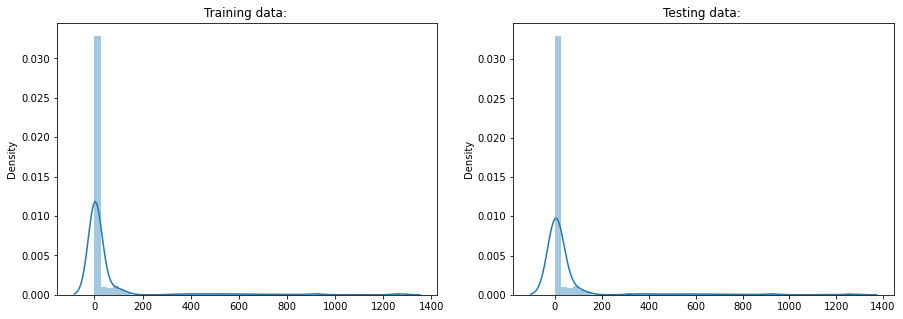

In [128]:
compare(X_train, X_test)